# **`Capstone Module 3 (Travel Insurance)`**
### by Amrina Rosyada
___

## **`Business Problem Understanding`**

**Dataset**: <br>
data_travel_insurance.csv

**Context**: <br>
This dataset pertains to a travel insurance company that offers insurance services to prospective travelers through a third party. Travel insurance is a type of insurance that provides coverage during domestic or international travel. Some countries even require travelers to have travel insurance, such as in European and American countries. The amount of premium to be paid depends on the desired coverage, travel duration, and travel destination. An insurance company operating in the travel insurance sector wants to identify potential policyholders who are likely to make insurance claims in order to provide them with the necessary coverage. The policyholder data in the insurance company's records includes travel destinations, insurance products, and other relevant information.

**Target**: 'Claim'<br>
- 0: No claim filed   
- 1: Claim filed

**Problem Statement**: <br>
The company aims to improve the efficiency of the travel insurance claim process by leveraging historical policyholder data to identify policyholders who are likely to file claims and require coverage. This will enable the company to optimize its resources. Previously, the company offered insurance to everyone through a third party without any selection criteria, resulting in financial losses for the company, as they were unaware of whether the individuals they were offering insurance to would actually file claims or not.

**Goals**: <br>
Based on this problem, the company aims to have the ability to predict the likelihood of a prospective policyholder filing a claim. This will prevent financial losses for the travel insurance company, as they will be able to determine in advance if the prospective policyholder is likely to file a claim.

**Analytical Segmentation**: <br>
Therefore, my approach will involve analyzing the data to identify patterns that differentiate policyholders who file claims from those who do not (classification). I will then build a classification model that will help the company predict the probability of a policyholder filing a claim or not.

**Metric Evaluation**

![metrics.png](metrics.png)

Type 1 error: False Positive. The model predicts that a customer will file a claim, but in reality, they do not. This results in the company losing potential customers as they are not offered insurance policies.

Type 2 error: False Negative. The model predicts that a customer will not file a claim, but in reality, they do. This requires the company to pay unexpected claim expenses.

Based on the company's request, my main focus is on identifying customers who are truly likely to file a claim. Although both errors are important, I prioritize avoiding False Negatives over False Positives. In this context, the most suitable metric is **Recall**.

Recall is a metric that measures how well the model accurately identifies customers who will file a claim. In this case, False Negatives have a more significant impact because the company incurs losses if it fails to identify customers who will actually file claims.

Therefore, in the evaluation of the model, I will pay attention to and compare the Recall values to ensure that the model's ability to identify customers who will file claims (True Positive) is very high, and the occurrence of False Negatives is minimized.

## `Library`

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display

# Feature Engineering
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
# plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

## `Importing Data`

In [2]:
travel = pd.read_csv('data_travel_insurance.csv')
display(travel.head(),travel.tail())

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No
44327,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,172,SINGAPORE,0.0,17.82,31,No


## `Checking unique value`
Here are all the unique values of all the categorical datas for us to see. Some of this data can be removed according to need and how many missing values in that data. The missing value can be found in column Gender where it has **nan** meaning null or empty data.

In [3]:
for column_name, column_data in travel.items():
    print(f"{column_name}'s Values: {column_data.unique()}")
    print()

Agency's Values: ['C2B' 'EPX' 'JZI' 'CWT' 'LWC' 'ART' 'CSR' 'SSI' 'RAB' 'KML' 'TST' 'TTW'
 'JWT' 'ADM' 'CCR' 'CBH']

Agency Type's Values: ['Airlines' 'Travel Agency']

Distribution Channel's Values: ['Online' 'Offline']

Product Name's Values: ['Annual Silver Plan' 'Cancellation Plan' 'Basic Plan'
 '2 way Comprehensive Plan' 'Bronze Plan' '1 way Comprehensive Plan'
 'Rental Vehicle Excess Insurance' 'Single Trip Travel Protect Gold'
 'Silver Plan' 'Value Plan' '24 Protect' 'Annual Travel Protect Gold'
 'Comprehensive Plan' 'Ticket Protector' 'Travel Cruise Protect'
 'Single Trip Travel Protect Silver' 'Individual Comprehensive Plan'
 'Gold Plan' 'Annual Gold Plan' 'Child Comprehensive Plan' 'Premier Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Platinum' 'Spouse or Parents Comprehensive Plan'
 'Travel Cruise Protect Family']

Gender's Values: ['F' nan 'M']

Duration's Values: [ 365    4   19   20    8    2   25   90   24   43  103 

In [4]:
travel

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [5]:
travel.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Gender', 'Duration', 'Destination', 'Net Sales',
       'Commision (in value)', 'Age', 'Claim'],
      dtype='object')

## `Checking the data types and description`

### Dataset
- The "Travel Insurance" data is provided by a third-party travel insurance servicing company based in Singapore.
- The data is downloadable from Kaggle, [https://www.kaggle.com/mhdzahier/travel-insurance](https://www.kaggle.com/mhdzahier/travel-insurance)
- There are 11 fields/attributes where "Claim" is the target variable.
- The fields and their data types are:

| Field Name | Data Type | Glossary |
|----------------:|:-----------------:|:-----------------:|
| Agency    |  String | Name of agency |
| Agency Type |  String | Type of travel insurance agencies |
| Distribution Channel |  String | Distribution channel of travel insurance agencies |
| Product Name |  String | Name of the travel insurance products |
| Claim|  Float | Claim Status |
| Duration|  Integer | Duration of travel |
| Destination |  String | Destination of travel |
| Net Sales|  Float | Amount of sales of travel insurance policies | 
| Commision (in value)|  Float | Commission received for travel insurance agency |
| Gender |  String | Gender of insured |
| Age |  Integer | Age of insured |

In [6]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


### Categorical features
In this data the categorical data are Agency, Agency Type, Distribution Channel, Product Name, Claim, Destination, and Gender.

## `Data Cleaning`

In [7]:
#Check duplicated data
travel.duplicated().sum()

4667

There is 4667 duplicated data detected, dropping this duplicated data will reduce the biasness of this dataset and ensure that each observation is unique. Duplicated data can lead to inaccurate analysis and modeling results.

In [8]:
#Data Description
#.sample(5, replace=True) biar bisa kebaca kalau misal ada yang dibawah 5, kalo gapake replace true gabisa running karena ga toleransi yg dibawah 5
#bisa juga diakalin .sample(2) kenapa 2? karena menggunakan angka yg paling kecil di data
listItem = []
for col in travel.columns :
    listItem.append(
        [col, 
         travel[col].dtype,
         travel[col].isna().sum(),
         round(travel[col].isna().sum()/len(travel)*100,2),
         travel[col].nunique(),
         list(travel[col].drop_duplicates().sample(5, replace=True).values)]
    )

desc_data = pd.DataFrame(data=listItem,
                         columns = ['Column', 'Data Type', 'Missing Value', '% Missing Value', 'Num Unique', 'Unique Sample'])
desc_data

,Column,Data Type,Missing Value,% Missing Value,Num Unique,Unique Sample
0,Agency,object,0,0.00,16,"[CBH, EPX, SSI, CCR, ADM]"
1,Agency Type,object,0,0.00,2,"[Airlines, Airlines, Travel Agency, Travel Age..."
2,Distribution Channel,object,0,0.00,2,"[Online, Offline, Online, Offline, Offline]"
3,Product Name,object,0,0.00,26,"[24 Protect, Annual Gold Plan, Annual Travel P..."
4,Gender,object,31647,71.39,2,"[F, F, F, M, F]"
5,Duration,int64,0,0.00,437,"[242, 365, 289, 301, 53]"
6,Destination,object,0,0.00,138,"[PANAMA, INDIA, INDONESIA, BENIN, INDONESIA]"
7,Net Sales,float64,0,0.00,1006,"[-128.0, 7.2, 112.7, 176.25, 108.0]"
8,Commision (in value),float64,0,0.00,915,"[36.73, 20.15, 118.8, 36.0, 0.98]"
9,Age,int64,0,0.00,89,"[43, 35, 31, 17, 10]"


In [9]:
travel.shape

(44328, 11)

### Checking null data
**df.isnull().sum()** is to show all the dataset that is null and sum it all up to know how much null in that certain column have.<br>

In here, we see that ***gender*** is the only dataset that has the highest empty dataset compared to others.<br> 
For the NaN dataset, there are ways to deal with this:
1. Remove the gender column completely since it contains many empty datasets
2. Remove the rows in which the data is empty

In [10]:
print("Gender NULL dataset: ", travel['Gender'].isnull().sum())
print("Gender dataset: ", travel['Gender'].notnull().sum())
gender_nulls=travel.Gender.isnull().sum()/len(travel.Gender)
print(f"{round(gender_nulls*100,3)} % of the data is missing for the Gender column.")

Gender NULL dataset:  31647
Gender dataset:  12681
71.393 % of the data is missing for the Gender column.


However, with the amount of empty data for Gender in this dataset, we can't handle it by filling with new datas. What we can do is **removing the data column** because the missing data is too high and the dataset filled is too little to be used for predicting the values.<br><br>

**Dataset Overview for Gender Column:**<br>
The amount of **null** data in Gender column is **31647**/63326 data, or about **71%** of the dataset.<br>
The amount of **FILLED** data in Gender column is **12681**/63326 data, or about **28%** of the dataset.<br><br>

**Other strategy** is to remove the row in which the data is missing. However, this can also cause an imbalance dataset, thus creating bias for certain data only. Especially with the amount that needs to be removed.

## `Checking Missing Value`
Numerical Columns: Duration, Net Sales, Commision (in value), Age.

### Checking outliers using IQR & Boxplot

In [11]:
#Check outliers in numerical columns
numeric_cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

In [12]:
travel['Claim'].value_counts()

Claim
No     43651
Yes      677
Name: count, dtype: int64

In [13]:
Yes = travel[travel['Claim']=='Yes']

In [14]:
Yes['Gender'].value_counts()

Gender
F    254
M    221
Name: count, dtype: int64

In [15]:
No = travel[travel['Claim']=='No']

In [16]:
No['Gender'].value_counts()

Gender
M    6283
F    5923
Name: count, dtype: int64

In [17]:
travel['Gender'].value_counts()

Gender
M    6504
F    6177
Name: count, dtype: int64

In [18]:
display(travel[travel['Gender']=='F'])
display(travel[travel['Gender']=='M'])

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.00,54.00,57,No
12,JZI,Airlines,Online,Basic Plan,F,103,"KOREA, REPUBLIC OF",26.00,9.10,48,No
13,C2B,Airlines,Online,Annual Silver Plan,F,376,SINGAPORE,252.85,63.21,43,Yes
28,C2B,Airlines,Online,Bronze Plan,F,30,SINGAPORE,16.00,4.00,58,Yes
29,JZI,Airlines,Online,Basic Plan,F,8,THAILAND,30.00,10.50,42,No
...,...,...,...,...,...,...,...,...,...,...,...
44296,C2B,Airlines,Online,Silver Plan,F,10,SINGAPORE,25.00,6.25,26,No
44298,C2B,Airlines,Online,Bronze Plan,F,22,SINGAPORE,40.50,10.13,34,No
44302,C2B,Airlines,Online,Bronze Plan,F,51,SINGAPORE,47.00,11.75,39,No
44310,C2B,Airlines,Online,Silver Plan,F,16,SINGAPORE,58.00,14.50,37,No


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
8,JZI,Airlines,Online,Basic Plan,M,4,THAILAND,22.0,7.70,39,No
11,C2B,Airlines,Online,Annual Silver Plan,M,365,SINGAPORE,216.0,54.00,27,No
21,JZI,Airlines,Online,Basic Plan,M,12,VIET NAM,30.0,10.50,35,Yes
...,...,...,...,...,...,...,...,...,...,...,...
44306,RAB,Airlines,Online,Value Plan,M,16,BRUNEI DARUSSALAM,15.0,6.00,46,No
44312,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,M,11,CHINA,49.5,32.18,84,No
44314,JZI,Airlines,Online,Basic Plan,M,13,THAILAND,22.0,7.70,42,No
44317,JZI,Airlines,Online,Value Plan,M,11,UNITED KINGDOM,87.0,30.45,65,No


### Data Proportion

In [19]:
#Imbalance itu >50% sudah termasuk ga imbang, jadi kalo >50% apalagi hampir mendekati 100, super ga imbang datanya
travel['Claim'].value_counts()/len(travel)*100

Claim
No     98.472749
Yes     1.527251
Name: count, dtype: float64

Upon examining the dataset, it is evident that the majority of individuals in this historical data did not file insurance claims, while the number of individuals who did file claims is quite small. As a result, it is likely that my modeling approach may not achieve a high accuracy due to the highly imbalanced distribution of Claim Yes and No propositions in the data.

In [20]:
travel.duplicated().sum()

4667

In [21]:
# Assuming your DataFrame is named "travel"
duplicates = travel.duplicated()

# Find the adjacent rows with duplicates
adjacent_duplicates = duplicates.shift(-1) | duplicates.shift(1)

# Get the indices of adjacent duplicate rows
indices = travel[adjacent_duplicates].index

print(indices)

Index([  330,   332,   359,   361,   472,   474,   487,   489,   635,   637,
       ...
       44306, 44307, 44308, 44309, 44310, 44312, 44314, 44316, 44320, 44322],
      dtype='int64', length=8732)


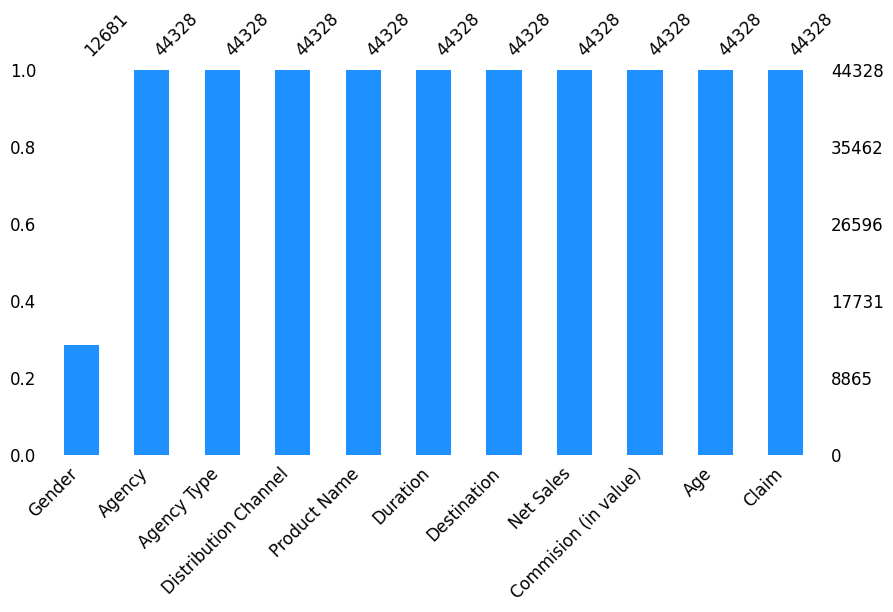

In [22]:
msno.bar(travel,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

<Axes: >

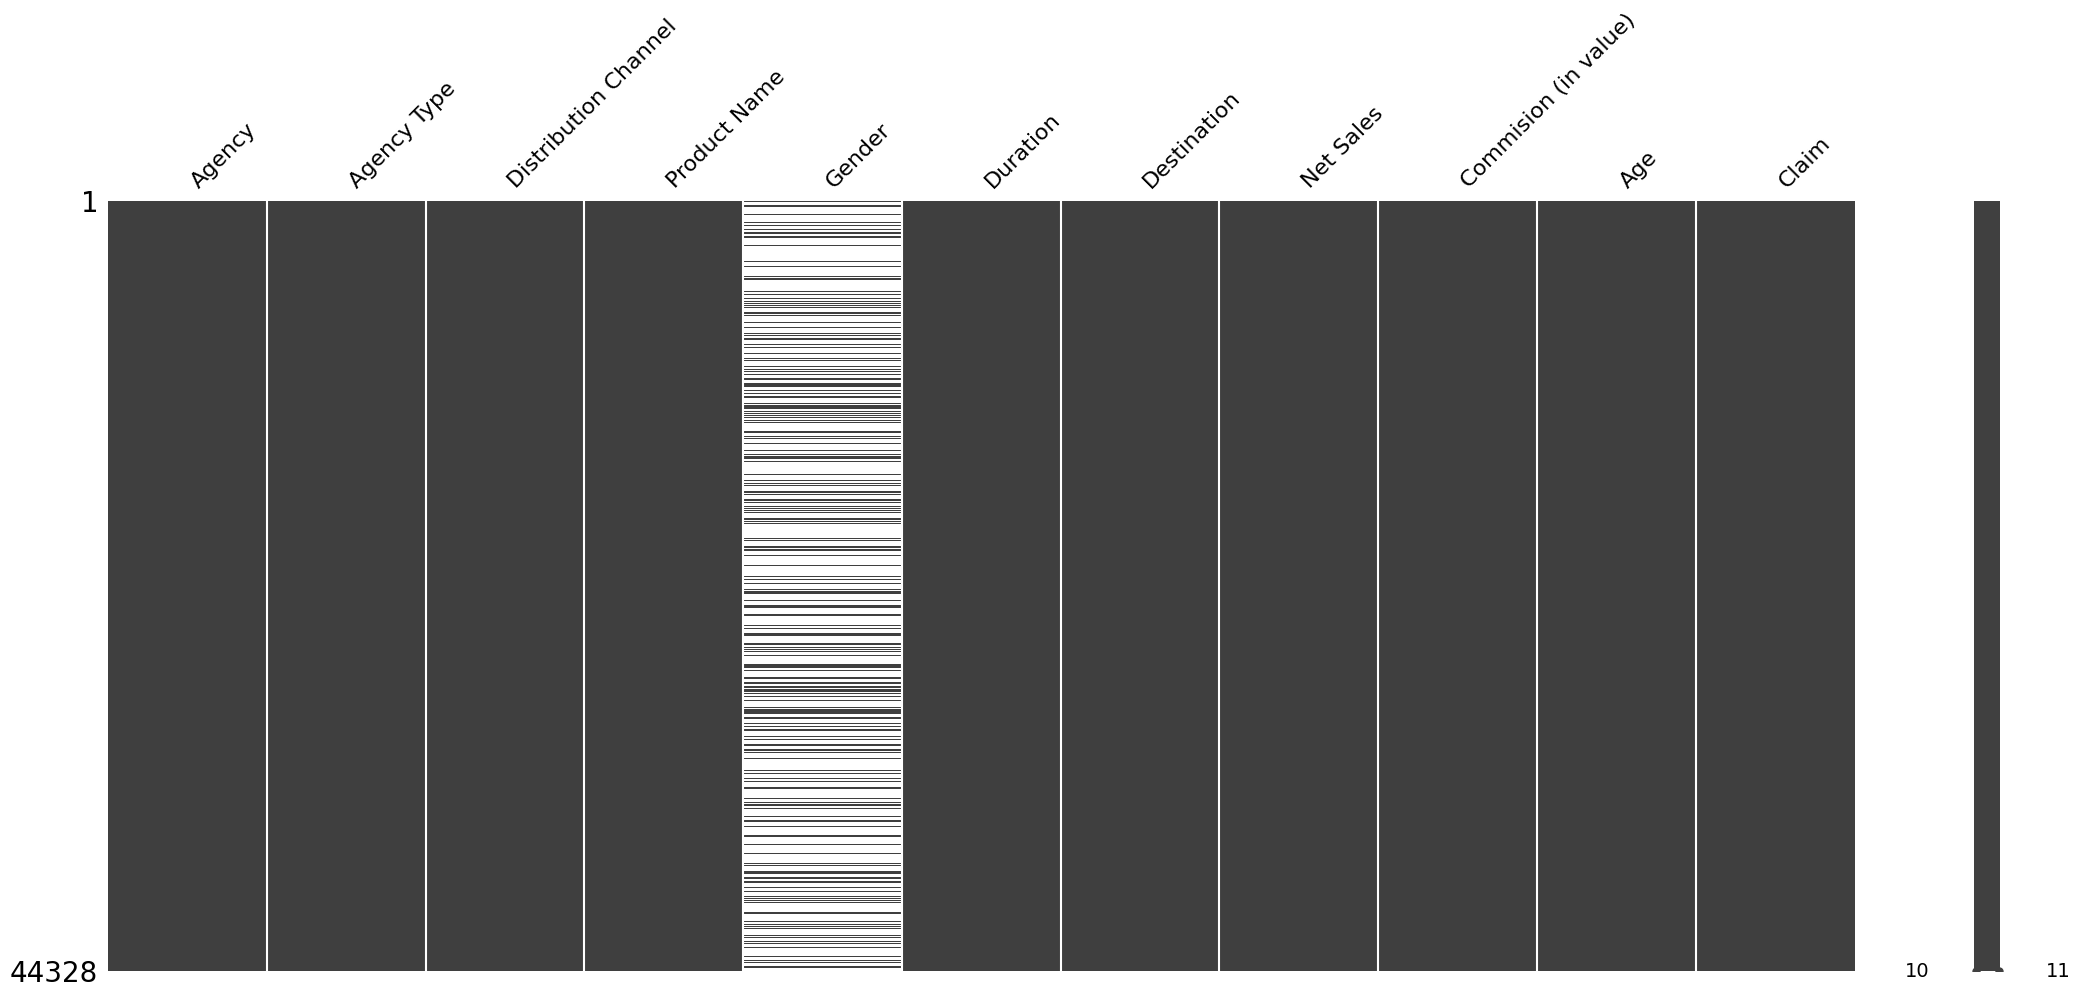

In [23]:
msno.matrix(travel)

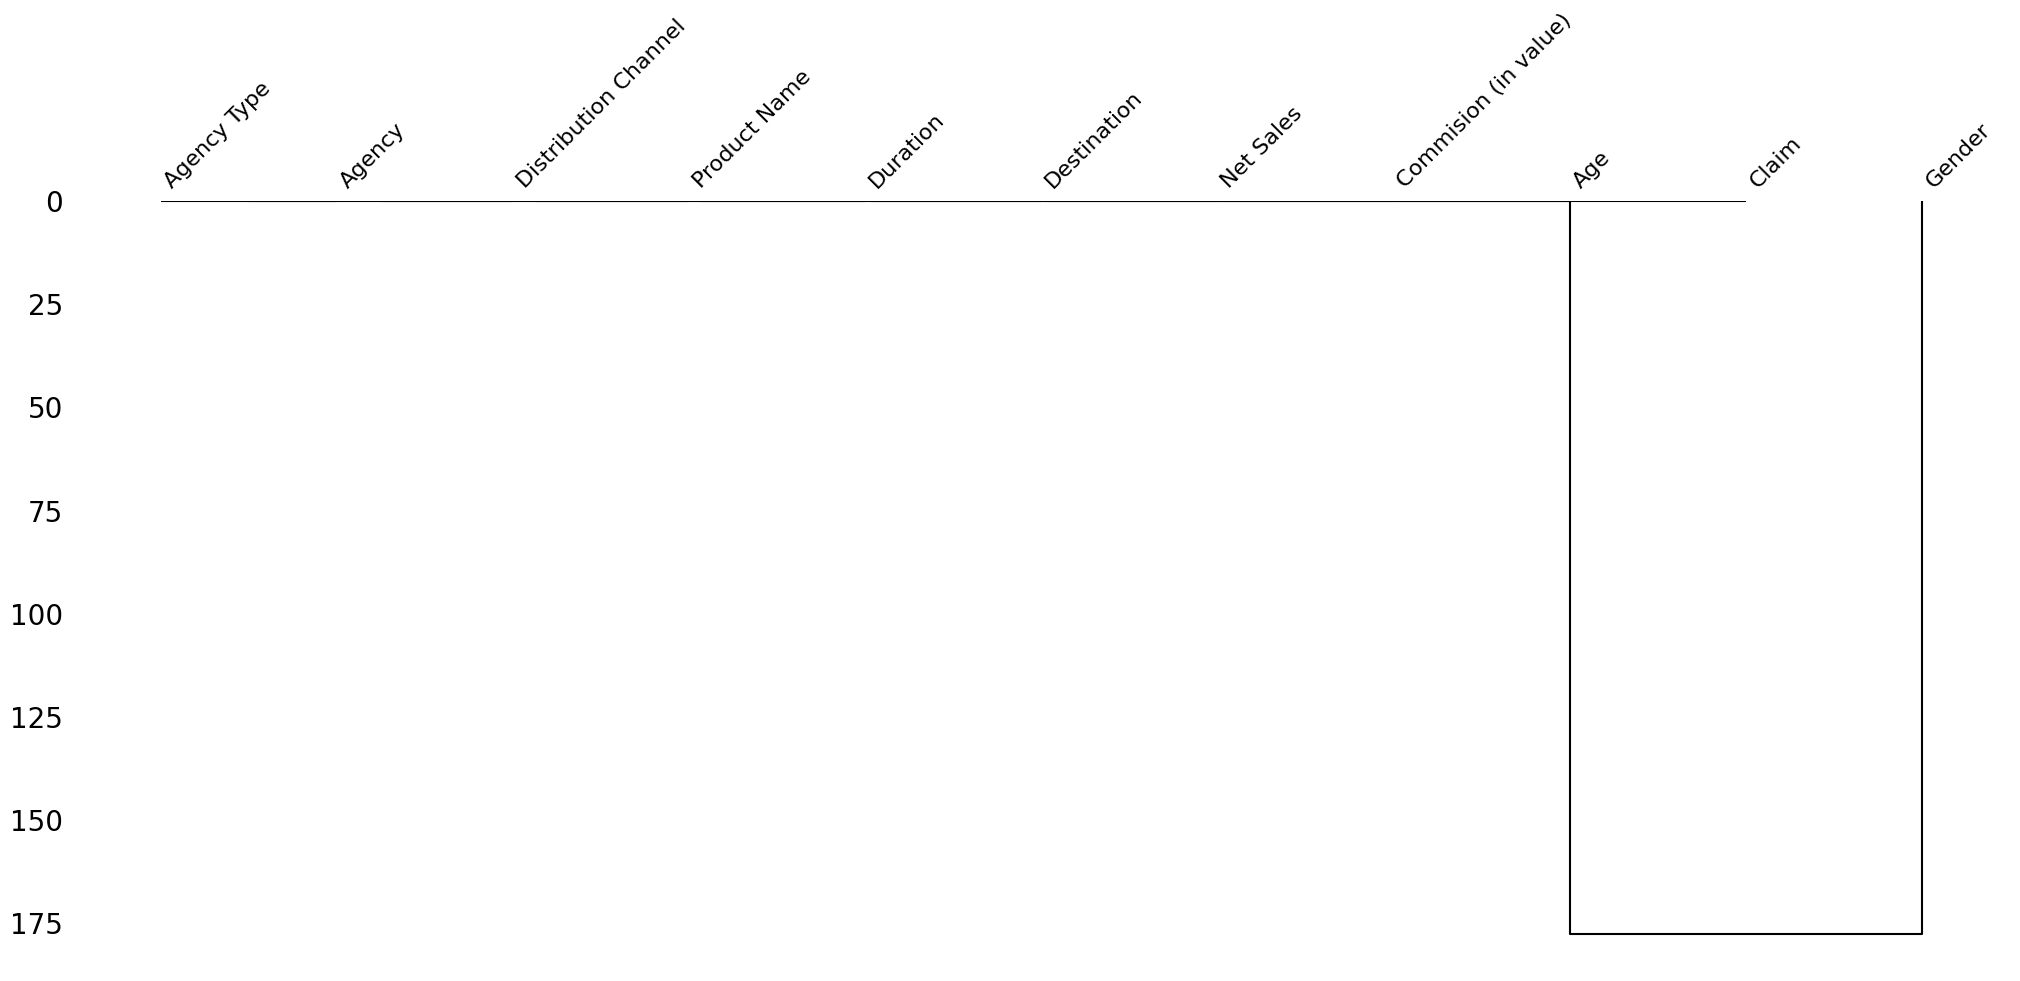

In [24]:
msno.dendrogram(travel)
plt.show()

By using data visualization in the form of bar plots and a correlation matrix, it can be observed that the "Gender" column has missing data, and this column is only filled to a extent of 25%.

From the dendrogram above, it can be seen that the "Gender" column only correlates with the "Age" column. Therefore, we need to group the number of missing data based on age ranges.

In [25]:
pd.DataFrame({
    'age_range':['10-19', '20-29', '30-39', '40-49', '50 or above'],
    'missing_values':[
        travel[(travel['Age']>=10) & (travel['Age']<20)]['Gender'].isna().sum(),
        travel[(travel['Age']>=20) & (travel['Age']<30)]['Gender'].isna().sum(),
        travel[(travel['Age']>=30) & (travel['Age']<40)]['Gender'].isna().sum(),
        travel[(travel['Age']>=40) & (travel['Age']<50)]['Gender'].isna().sum(),
        travel[(travel['Age']>=50)]['Gender'].isna().sum(),
    ]
})

,age_range,missing_values
0,10-19,26
1,20-29,2768
2,30-39,22059
3,40-49,3763
4,50 or above,3031


From the DataFrame grouping the data with missing values based on age ranges, it can be observed that the majority of individuals who did not specify their gender when applying for travel insurance fall within the age range of 30-39 years.

However, it is important to note that travel insurance applications usually require applicants to provide complete and accurate information, and leaving any data unfilled or empty is not acceptable. Therefore, we need to remove all data with missing values so that we can build machine learning models and algorithms that generate complete and accurate predicted data, as well as comply with the requirement of providing complete data requested by most travel insurance providers.

In [26]:
travel['Gender'].isna().sum()

31647

## `Outlier & Missing Value`

1. **Outlier**   
   There are a total of 8225 extreme outliers in the 4 numerical columns of this dataset. The breakdown of extreme outliers is as follows:
   - For the 'Age' column, there are 1471 outliers.
   - For the 'Commision (in value)' column, there are 2689 outliers.
   - For the 'Net Sales' column, there are 1799 outliers.
   - For the 'Duration' column, there are 2266 outliers.

   Why are we specifically looking for extreme outliers? Because these are parameters that are sensitive to outliers. Data that are not too important and free from extreme outliers can provide better results in analysis, such as in clustering cases. Sensitive outliers can result in values that are far beyond logical limits, so it is important to remove extreme outliers. Extreme outliers refer to data that are highly implausible or impossible to occur.

2. **Missing Value**   
   However, due to the high amount of missing data in the Gender column, we cannot handle it by filling in new data. What we can do is **remove the column** entirely because the missing data is too extensive and the remaining dataset is too small to be used for predicting values.<br><br>

   **Dataset Overview for the Gender Column:**<br>
   The number of **null** data in the Gender column is **45107** out of 63326 data, which accounts for **71.39%** of the dataset.<br>
   The number of **filled** data in the Gender column is **18219** out of 63326 data, which accounts for approximately **28.61%** of the dataset.<br><br>

   **Another strategy** is to remove the rows where the data is missing. However, this can lead to an imbalanced dataset and introduce bias towards certain data. This is especially challenging given the significant amount of data that would need to be removed.

### Check outlier

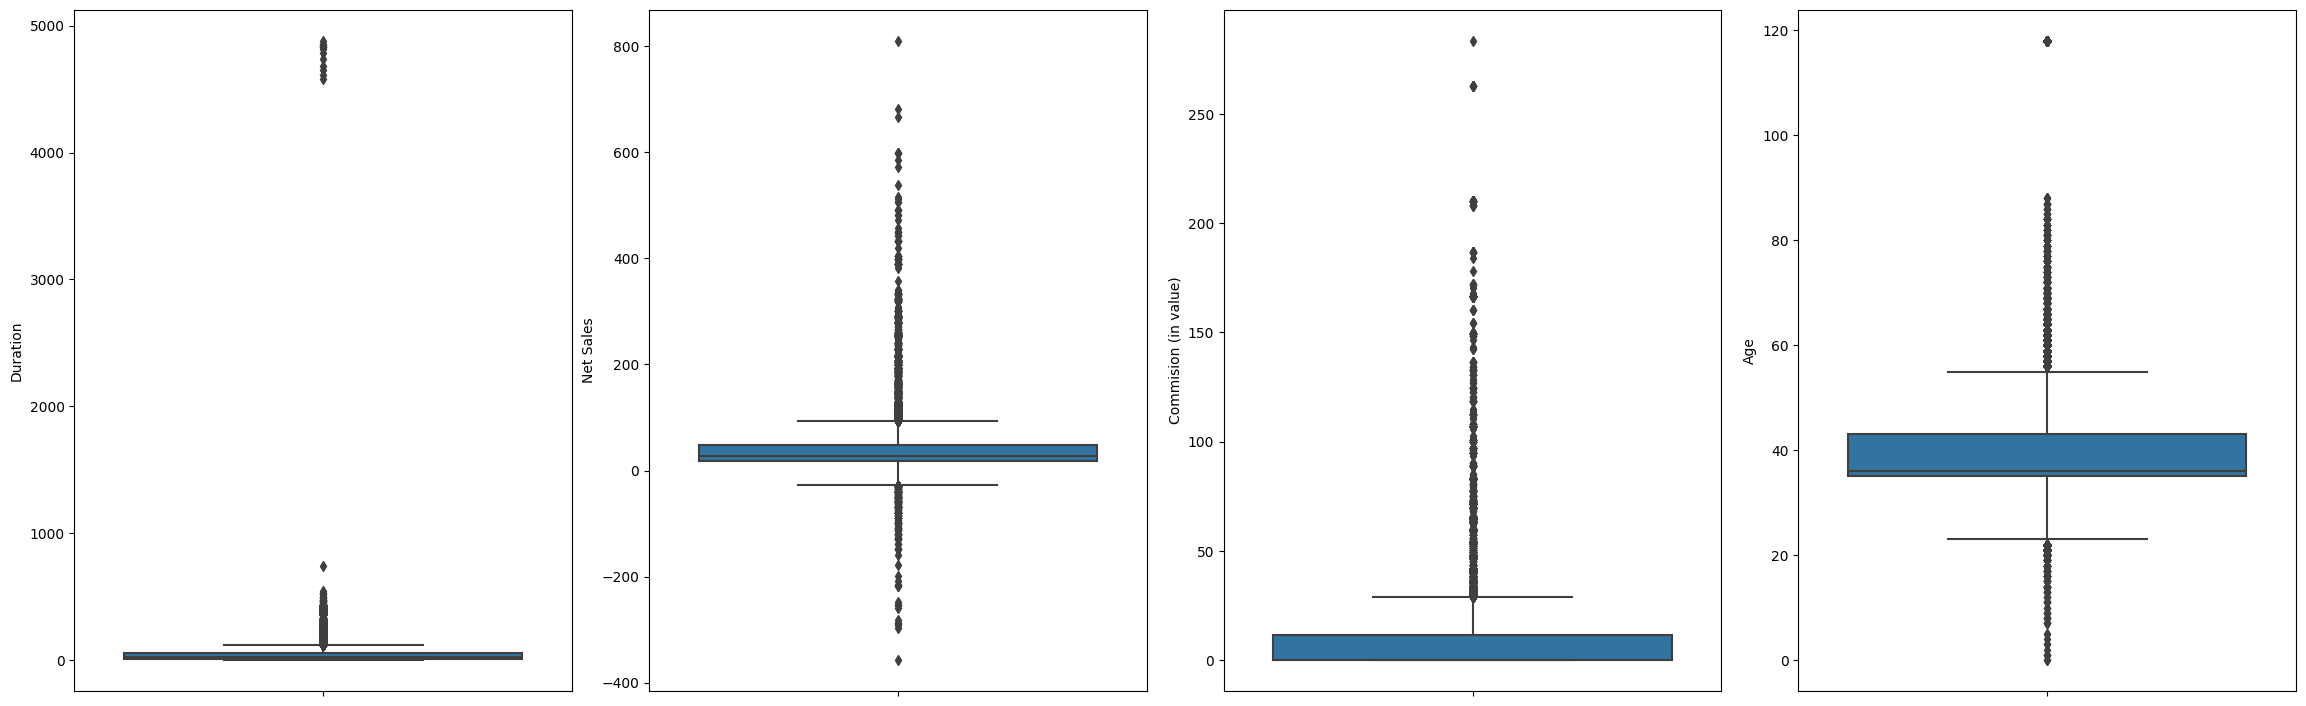

In [27]:
# Boxplot

numericCols = travel.drop(columns='Claim').select_dtypes(include=[float, int]).columns

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(23,7))
index = 0
ax = ax.flatten()

for col in numericCols:
    sns.boxplot(y=col, data=travel, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

It appears that the Duration, Net Sales, and Commission in Value columns have extreme outliers. These parameters are sensitive to outliers, and the data points that are extreme outliers are not significant and can be considered as clean data without extreme outliers. In cases like clustering, sensitive outliers can cause values that are extremely far from logical boundaries, so it's important to remove these extreme outliers. Extreme outliers are data points that are highly illogical or unrealistic.

In [28]:
#Data Description
#.sample(5, replace=True) biar bisa kebaca kalau misal ada yang dibawah 5, kalo gapake replace true gabisa running karena ga toleransi yg dibawah 5
#bisa juga diakalin .sample(2) kenapa 2? karena menggunakan angka yg paling kecil di data
listItem = []
for col in travel.columns :
    listItem.append(
        [col, 
         travel[col].dtype,
         travel[col].isna().sum(),
         round(travel[col].isna().sum()/len(travel)*100,2),
         travel[col].nunique(),
         list(travel[col].drop_duplicates().sample(5, replace=True).values)]
    )

desc_data = pd.DataFrame(data=listItem,
                         columns = ['Column', 'Data Type', 'Missing Value', '% Missing Value', 'Num Unique', 'Unique Sample'])
desc_data

,Column,Data Type,Missing Value,% Missing Value,Num Unique,Unique Sample
0,Agency,object,0,0.00,16,"[RAB, KML, EPX, TTW, TTW]"
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency, Airlines, Airlines, ..."
2,Distribution Channel,object,0,0.00,2,"[Offline, Offline, Online, Online, Offline]"
3,Product Name,object,0,0.00,26,"[Ticket Protector, 2 way Comprehensive Plan, 1..."
4,Gender,object,31647,71.39,2,"[nan, F, M, nan, M]"
5,Duration,int64,0,0.00,437,"[404, 386, 281, 45, 69]"
6,Destination,object,0,0.00,138,"[MALDIVES, VENEZUELA, RWANDA, REUNION, BELGIUM]"
7,Net Sales,float64,0,0.00,1006,"[47.25, 146.25, 1.54, 23.5, 32.25]"
8,Commision (in value),float64,0,0.00,915,"[17.15, 20.03, 12.56, 31.05, 66.25]"
9,Age,int64,0,0.00,89,"[2, 27, 37, 73, 61]"


### Outlier in 'Age'

In [30]:
Q1 = travel['Age'].quantile(0.25)
Q3 = travel['Age'].quantile(0.75)
IQR = Q3 - Q1

#treshhold
treshhold = 3 * IQR

# Indentify Outliers
outliersWH = (travel['Age'] < Q1 - treshhold) | (travel['Age'] > Q3 + treshhold)

# Extreme Outliers Value
outlier_values = travel.loc[outliersWH,'Age']
print(f'Outlier: {outlier_values}')

Outlier: 37        68
51         8
99       118
105      118
131       69
        ... 
44160    118
44219    118
44268     69
44312     84
44319      0
Name: Age, Length: 1471, dtype: int64


In [31]:
outlier_values.index

Index([   37,    51,    99,   105,   131,   182,   189,   203,   316,   346,
       ...
       44070, 44089, 44117, 44140, 44150, 44160, 44219, 44268, 44312, 44319],
      dtype='int64', length=1471)

### Outlier in 'Commision (in value)'

In [32]:
Q1 = travel['Commision (in value)'].quantile(0.25)
Q3 = travel['Commision (in value)'].quantile(0.75)
IQR = Q3 - Q1

#treshhold
treshhold = 3 * IQR

# Indentify Outliers
outliersWH = (travel['Commision (in value)'] < Q1 - treshhold) | (travel['Commision (in value)'] > Q3 + treshhold)

# Extreme Outliers Value
outlier_values = travel.loc[outliersWH,'Commision (in value)']
print(f'Outlier: {outlier_values}')

Outlier: 0         54.00
11        54.00
13        63.21
50       132.99
53        54.00
          ...  
44217     54.00
44224     75.25
44249     53.46
44267     83.25
44324     47.52
Name: Commision (in value), Length: 2689, dtype: float64


In [33]:
travel.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Gender', 'Duration', 'Destination', 'Net Sales',
       'Commision (in value)', 'Age', 'Claim'],
      dtype='object')

### Outlier in 'Net Sales'

In [34]:
Q1 = travel['Net Sales'].quantile(0.25)
Q3 = travel['Net Sales'].quantile(0.75)
IQR = Q3 - Q1

#treshhold
treshhold = 3 * IQR

# Indentify Outliers
outliersWH = (travel['Net Sales'] < Q1 - treshhold) | (travel['Net Sales'] > Q3 + treshhold)

# Extreme Outliers Value
outlier_values = travel.loc[outliersWH,'Net Sales']
print(f'Outlier: {outlier_values}')

Outlier: 0        216.00
11       216.00
13       252.85
50       204.60
53       216.00
          ...  
44182    178.20
44210    333.00
44217    216.00
44224    301.00
44267    333.00
Name: Net Sales, Length: 1799, dtype: float64


### Outlier in 'Duration'

In [35]:
Q1 = travel['Duration'].quantile(0.25)
Q3 = travel['Duration'].quantile(0.75)
IQR = Q3 - Q1

#treshhold
treshhold = 3 * IQR

# Indentify Outliers
outliersWH = (travel['Duration'] < Q1 - treshhold) | (travel['Duration'] > Q3 + treshhold)

# Extreme Outliers Value
outlier_values = travel.loc[outliersWH,'Duration']
print(f'Outlier: {outlier_values}')

Outlier: 0        365
11       365
13       376
50       370
53       366
        ... 
44227    191
44257    242
44259    278
44262    223
44267    370
Name: Duration, Length: 2266, dtype: int64


## `Drop gender` 
Since the percentage of missing values is quite large, which is 70%, and the data itself is not needed for travel insurance analysis, it would not be appropriate to impute the missing values. Imputing such a large percentage of missing values could introduce bias into the data. Therefore, it is better to remove the column entirely from the analysis to avoid any potential bias.

In [36]:
travel.drop('Gender', axis=1, inplace=True)

In [37]:
travel.shape

(44328, 10)

Choosing drop 'Gender' over dropna, because I don't want to cause the biasness in this data. Using dropna will dropping more than 70% data, which setting aside just 28% data more or less.

# Drop duplicate 

In [39]:
travel.duplicated().sum()

5004

In [70]:
travel.drop_duplicates(inplace=True)

In [41]:
# 39324 more than 88% from 44328 (after drop gender column)
travel.shape

(39324, 10)

In [42]:
print(f"Number of duplicated rows:  {travel.duplicated().sum()}")

Number of duplicated rows:  0


Drop 5004 or more than 11% duplicated data to reduce the biasness. 

In [43]:
travel.describe()

,Duration,Net Sales,Commision (in value),Age
count,39324.000000,39324.00000,39324.000000,39324.000000
mean,52.275989,42.20253,10.386189,39.833054
std,113.404932,49.70403,20.345275,13.225494
min,-1.000000,-357.50000,0.000000,0.000000
25%,11.000000,19.00000,0.000000,35.000000
50%,25.000000,29.00000,0.000000,36.000000
75%,57.000000,50.00000,11.880000,44.000000
max,4881.000000,810.00000,283.500000,118.000000


We will remove data that does not meet the criteria, one of which is travel duration exceeding 18 months or 547 days, as most travel insurance providers offer insurance with a maximum duration of 18 months. There is only one row of data that does not meet this travel duration requirement.

In addition, there are some travel applicants who are over 100 years old. It is assumed that they are no longer able to travel due to their health condition or have passed away before they had the opportunity to travel. Therefore, this data should also be removed. However, travel applicants who are elderly and below 100 years old will not be removed, as it is assumed that they are still able to travel as long as they are physically and mentally healthy.

In [44]:
## Menghapus data durasi Outlier yang melebihi 365 hari
duration_outlier = travel[travel['Duration']>547]
duration_outlier

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
87,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,No
4678,SSI,Airlines,Online,Ticket Protector,4857,SINGAPORE,0.32,0.09,48,No
10172,SSI,Airlines,Online,Ticket Protector,4815,SINGAPORE,0.32,0.09,48,No
12140,SSI,Airlines,Online,Ticket Protector,4652,SINGAPORE,0.32,0.09,48,No
19497,SSI,Airlines,Online,Ticket Protector,4881,SINGAPORE,0.13,0.04,48,No
20038,SSI,Airlines,Online,Ticket Protector,4844,SINGAPORE,0.32,0.09,48,No
21551,C2B,Airlines,Online,Annual Silver Plan,740,SINGAPORE,0.00,54.19,36,No
22215,SSI,Airlines,Online,Ticket Protector,4580,SINGAPORE,0.32,0.09,48,No
25606,SSI,Airlines,Online,Ticket Protector,4685,SINGAPORE,0.32,0.09,48,No
28032,SSI,Airlines,Online,Ticket Protector,4829,SINGAPORE,0.32,0.09,48,No


The conclusion that can be drawn is that the average of this dataset is not normally distributed and it contains outliers.

Note: The histplot divided based on Claim Yes is not visible due to the small dataset.

Here, I observe outlier values in the **Duration** column. Based on my knowledge, the duration provided by insurance companies will cover a maximum of **1 year** (based on reference from Zurich Travel Insurance). Therefore, I will drop data with a duration of more than **365 days**.

In [45]:
# Menghapus data umur Outlier yang melebihi usia 100 tahun
age_outlier = travel[travel['Age']>100]
age_outlier

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
99,ART,Airlines,Online,Value Plan,7,MALAYSIA,29.0,10.15,118,No
105,JZI,Airlines,Offline,Basic Plan,16,INDONESIA,37.0,12.95,118,No
363,JWT,Airlines,Online,Value Plan,12,INDIA,39.0,15.60,118,No
373,JWT,Airlines,Online,Value Plan,6,INDIA,39.0,15.60,118,No
727,JWT,Airlines,Online,Value Plan,76,INDIA,100.0,40.00,118,No
...,...,...,...,...,...,...,...,...,...,...
43838,JWT,Airlines,Online,Value Plan,67,INDIA,200.0,80.00,118,No
43856,JWT,Airlines,Online,Value Plan,10,INDIA,50.0,20.00,118,Yes
43928,JWT,Airlines,Online,Value Plan,83,INDIA,180.0,72.00,118,No
44089,JWT,Airlines,Online,Value Plan,42,INDIA,31.0,12.40,118,No


In [46]:
display(travel[travel['Duration'] <= 0].head(), len(travel[travel['Duration'] == 0]))

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
242,JZI,Airlines,Online,Basic Plan,0,CHINA,22.00,7.70,34,No
1782,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,1.80,0.50,48,No
1853,JWT,Airlines,Online,Value Plan,0,INDIA,62.00,24.80,118,No
2558,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,9.77,2.74,48,No
3236,LWC,Travel Agency,Online,Single Trip Travel Protect Gold,0,INDIA,35.25,22.91,24,No


34

In [47]:
travel[(travel['Net Sales'] < 0) & (travel['Claim']== 'No')]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
94,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,-216.75,54.19,36,No
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,430,AUSTRALIA,-59.40,35.64,41,No
121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,77,JAPAN,-29.70,17.82,59,No
199,EPX,Travel Agency,Online,Cancellation Plan,29,HONG KONG,-12.00,0.00,36,No
241,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,57,AUSTRALIA,-59.40,35.64,28,No
...,...,...,...,...,...,...,...,...,...,...
43694,EPX,Travel Agency,Online,2 way Comprehensive Plan,140,UNITED STATES,-98.00,0.00,29,No
43743,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,23,MALAYSIA,-29.70,17.82,29,No
43751,EPX,Travel Agency,Online,2 way Comprehensive Plan,147,SPAIN,-68.00,0.00,36,No
43858,EPX,Travel Agency,Online,Cancellation Plan,49,UNITED KINGDOM,-68.00,0.00,36,No


In [48]:
travel['Net Sales'].value_counts

<bound method IndexOpsMixin.value_counts of 0        216.0
1         10.0
2         22.0
3        112.0
4         16.0
         ...  
44323     30.0
44324     79.2
44325     30.0
44326     36.0
44327      0.0
Name: Net Sales, Length: 39324, dtype: float64>

In [49]:
travel[(travel['Net Sales'] == 0) & travel['Claim'] == 'Yes'] 

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


In [50]:
travel[(travel['Age'] == 0)]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
37815,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,-30.0,10.5,0,No
44319,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.5,0,No


In [51]:
travel[(travel['Commision (in value)'] == 0)]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
5,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.0,36,No
6,EPX,Travel Agency,Online,1 way Comprehensive Plan,25,"KOREA, REPUBLIC OF",50.0,0.0,36,No
7,EPX,Travel Agency,Online,Cancellation Plan,90,SINGAPORE,78.0,0.0,22,No
...,...,...,...,...,...,...,...,...,...,...
44318,EPX,Travel Agency,Online,2 way Comprehensive Plan,65,INDONESIA,20.0,0.0,36,No
44320,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,VIET NAM,34.0,0.0,36,No
44322,EPX,Travel Agency,Online,2 way Comprehensive Plan,6,THAILAND,40.0,0.0,36,No
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.0,36,Yes


After checking, it is found that the following 3 columns, **Duration, Net Sales, and Age**, have negative and zero values. Here are my actions:

- Duration:
  - There are 29 rows with a duration value of 0. I have decided to drop these rows because they represent a small portion of the data.

- Net Sales:
  - For this column, there are 474 rows with negative net sales. Based on my assumption and knowledge, negative values in this column occur when customers cancel their travel insurance, resulting in negative sales. However, in this case, my model focuses on customers who do not cancel their travel insurance, so I will drop these 474 rows.

  - There are 1277 rows with a net sales value of 0. I assume that these are due to human or machine errors. Dropping these rows is not the best option as I consider these 1277 rows to be valuable data. Instead, I will change the value of 0 to NaN so that I can handle it during the data imputation process. (I will change it to NaN after performing EDA only.)

- Age:
  - There are only 2 rows with an age value of 0, so I will drop these rows.

Note: The column "Commission (in value)" with a value of 0 is considered acceptable, possibly due to contractual agreements.

## `Drop Outlier`

In [52]:
# Duration
travel['Duration'] = travel['Duration'].abs()

Duration_to_drop = travel[travel['Duration'] == 0].index
travel.drop(Duration_to_drop, inplace=True)

In [53]:
# Net Sales
Netsales_to_drop = travel[travel['Net Sales'] < 0].index
travel.drop(Netsales_to_drop, inplace=True)

In [54]:
# Age
Age_to_drop = travel[travel['Age'] <= 0].index
travel.drop(Age_to_drop, inplace=True)

In [55]:
travel.shape

(38812, 10)

## `EDA`

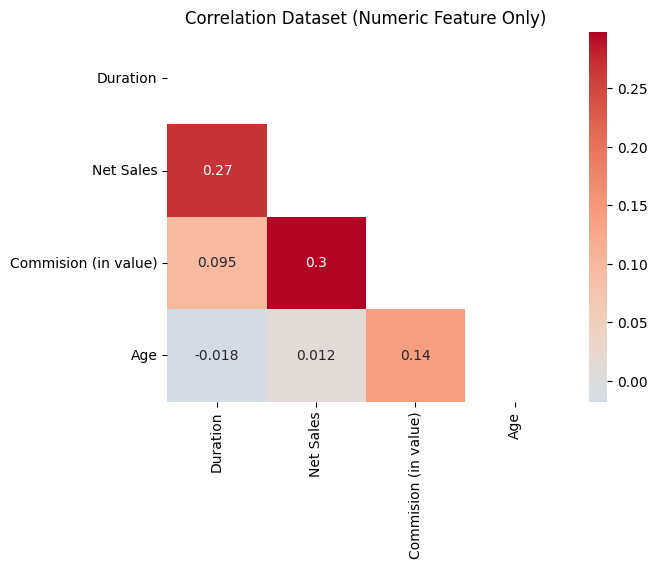

In [56]:
travel_numeric = travel.select_dtypes(include='number')

matrix = np.triu(travel_numeric.corr(method='spearman'))

sns.heatmap(
    data=travel_numeric.corr(method='spearman'),
    annot= True,            
    cmap= 'coolwarm',       
    center= 0,              
    mask= matrix
)
plt.title('Correlation Dataset (Numeric Feature Only)');

Explanation:
- The feature with the strongest positive correlation is Net Sales with Duration and Commission (in value) with Net Sales.
- The feature with a weak negative correlation is Age with Duration.
- The feature with a weak positive correlation is Age with Net Sales.

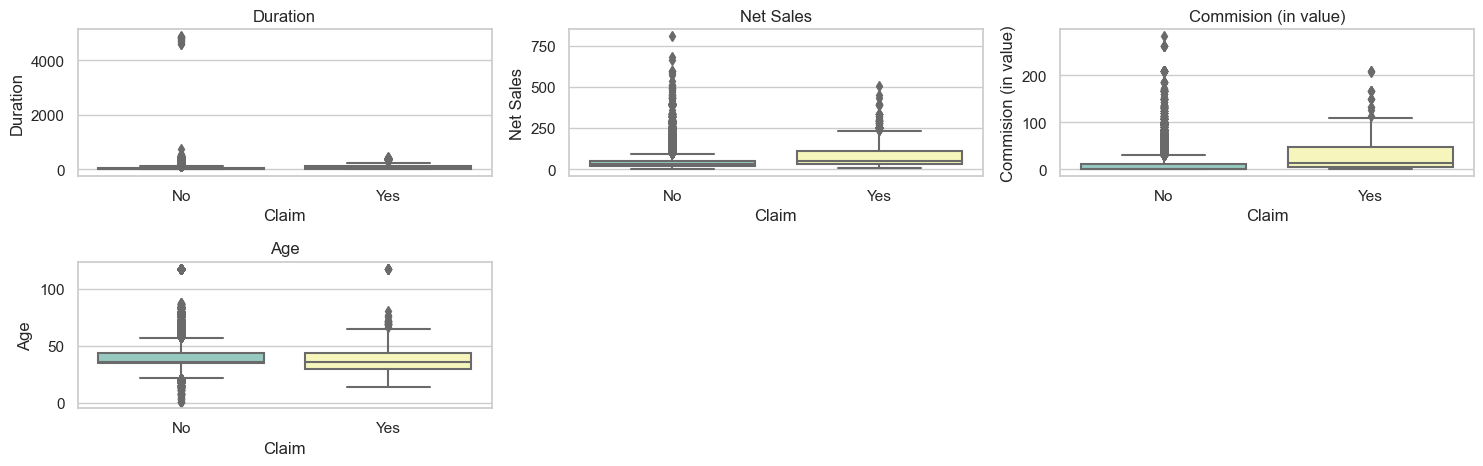

In [57]:
# Numerical Features
num_feature = [fea for fea in travel.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(y=feature, data=travel, x='Claim');
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

In [58]:
travel[travel['Duration']>365]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
13,C2B,Airlines,Online,Annual Silver Plan,376,SINGAPORE,252.85,63.21,43,Yes
50,LWC,Travel Agency,Online,Annual Travel Protect Gold,370,CHINA,204.60,132.99,39,Yes
53,C2B,Airlines,Online,Annual Silver Plan,366,SINGAPORE,216.00,54.00,37,No
87,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,No
226,TTW,Travel Agency,Offline,Individual Comprehensive Plan,368,SINGAPORE,97.00,0.00,37,No
...,...,...,...,...,...,...,...,...,...,...
44142,C2B,Airlines,Online,Annual Silver Plan,400,SINGAPORE,252.85,63.21,30,No
44210,C2B,Airlines,Online,Annual Gold Plan,378,SINGAPORE,333.00,83.25,47,No
44217,C2B,Airlines,Online,Annual Silver Plan,382,SINGAPORE,216.00,54.00,38,No
44224,C2B,Airlines,Online,Annual Silver Plan,390,SINGAPORE,301.00,75.25,48,Yes


In [59]:
Duration_day_to_drop_Out = travel[travel['Duration'] > 365].index
travel.drop(Duration_day_to_drop_Out, inplace=True)

In [60]:
travel.shape

(37952, 10)

Cleaning stage is done, so the remaining data I have now is 37,952 rows out of the original 44,328 rows.
___

Here is a brief EDA to see how many customers the Travel Insurance Company acquired through third parties and then further divide them based on whether they made a claim or not.

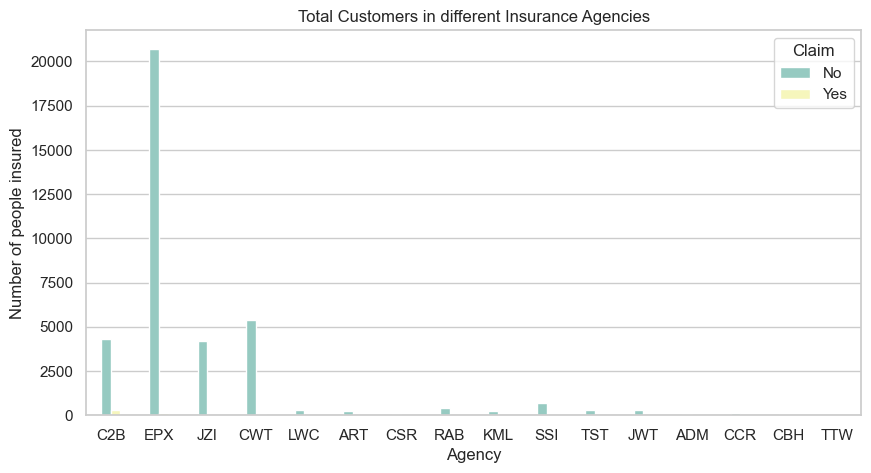

In [61]:
plt.figure(figsize=(10, 5))
sns.countplot(data=travel, x='Agency', width=0.4, hue='Claim')
plt.xlabel("Agency")
plt.ylabel("Number of people insured")
plt.title("Total Customers in different Insurance Agencies")
plt.show();

After taking a look, there are some insights that I obtained:
- The Claim data appears to be imbalanced, so during modeling, I will try to use resampling methods.
- It turns out that EPX is a third party that successfully offered Travel Insurance to many customers.

In [62]:
travel['Claim'].value_counts()

Claim
No     37370
Yes      582
Name: count, dtype: int64

## `DEFINE X & Y`

Then, before defining X and y, I will convert the target variable, **Claim**, into numeric values because machine learning algorithms cannot process object/text values. So, I will convert it into numeric format first.

In [63]:
# Mengubah kolom 'Claim' (target) menjadi nilai 0 untuk tidak Claim dan 1 untuk yang Claim
travel['Claim'] = np.where(travel['Claim'] == 'Yes', 1, 0)
travel['Claim'].value_counts()

Claim
0    37370
1      582
Name: count, dtype: int64

In [64]:
X = travel.drop('Claim',axis = 1)
y = travel['Claim']

In [65]:
y.value_counts()

Claim
0    37370
1      582
Name: count, dtype: int64

As we can see, the data is highly imbalanced with only 582 claims and 37,370 non-claims.

## `Data Splitting`

In the Data Splitting step, the dataset is divided into a train set and a test set. This allows us to evaluate the generalization of the model and determine if it tends to underfit or overfit. Here are the steps I took:
- I separated X and y, which represent the features and target variable, into the train set and test set.
- I set the **test_size** to `0.2`, which means I allocated 20% of the data as the test set.
- I set the **random_state** to `100` to ensure that the random selection of data for the train set and test set remains the same whenever this code is executed.
- I used **stratify** and passed `y` as the parameter to ensure that the proportion of the target variable is the same in the train set and test set. This is important because our target variable is categorical, and it's necessary to maintain the same proportion in both sets.

In [66]:
X_train, X_test, y_train, y_test =train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=100,
    stratify=y
)

display(X_train,
y_train,
X_test,
y_test)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
32923,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,7,ICELAND,59.40,35.64,38
36569,C2B,Airlines,Online,Bronze Plan,3,SINGAPORE,14.95,3.74,28
19927,JZI,Airlines,Online,Basic Plan,68,MALAYSIA,18.00,6.30,62
34043,EPX,Travel Agency,Online,2 way Comprehensive Plan,38,"TAIWAN, PROVINCE OF CHINA",20.00,0.00,29
11263,EPX,Travel Agency,Online,2 way Comprehensive Plan,136,UNITED STATES,112.00,0.00,25
...,...,...,...,...,...,...,...,...,...
8735,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,80,AUSTRALIA,69.30,41.58,41
35801,JZI,Airlines,Online,Basic Plan,67,NEW ZEALAND,22.00,7.70,24
43466,EPX,Travel Agency,Online,Cancellation Plan,52,MONGOLIA,80.00,0.00,36
20919,EPX,Travel Agency,Online,Cancellation Plan,32,AUSTRALIA,10.00,0.00,36


32923    0
36569    0
19927    0
34043    0
11263    0
        ..
8735     0
35801    0
43466    0
20919    0
22149    0
Name: Claim, Length: 30361, dtype: int64

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
14950,EPX,Travel Agency,Online,1 way Comprehensive Plan,11,SINGAPORE,21.0,0.0,36
592,EPX,Travel Agency,Online,2 way Comprehensive Plan,6,PAKISTAN,112.0,0.0,36
18106,RAB,Airlines,Online,Value Plan,12,BRUNEI DARUSSALAM,15.0,6.0,19
29651,EPX,Travel Agency,Online,Cancellation Plan,1,CHINA,10.0,0.0,36
39542,EPX,Travel Agency,Online,2 way Comprehensive Plan,11,INDONESIA,32.0,0.0,30
...,...,...,...,...,...,...,...,...,...
22795,JZI,Airlines,Online,Basic Plan,12,PHILIPPINES,30.0,10.5,64
23359,EPX,Travel Agency,Online,Cancellation Plan,10,INDONESIA,17.0,0.0,62
8874,EPX,Travel Agency,Online,Cancellation Plan,69,MYANMAR,12.0,0.0,36
4814,EPX,Travel Agency,Online,Cancellation Plan,2,MALAYSIA,10.0,0.0,44


14950    0
592      0
18106    0
29651    0
39542    0
        ..
22795    0
23359    0
8874     0
4814     0
4253     0
Name: Claim, Length: 7591, dtype: int64

## `Preprocessing`

Now I will determine which features need to be encoded, scaled, and imputed. Please note that the parameter choices I make may not necessarily be the best, so I will tune them during the Hyperparameter Tuning step after finding the best model through cross-validation.

Encoding:
- Onehot Encoder: I will use the Onehot encoding for the `Agency Type` and `Distribution Channel` features because they are non-ordinal features with a small number of unique values.
- Binary Encoder: I will use the Binary encoding for the `Agency`, `Product Name`, and `Destination` features because they have a large number of unique values and are also non-ordinal. Using Onehot encoding would result in too many new features, and using Ordinal/Label encoding may not be suitable. Therefore, I will try using Binary Encoding.

Scaling:
- Robust Scaler: I will use the Robust Scaler for the `Duration`, `Net Sales`, `Commision (in value)`, and `Age` features because these columns have values with outliers. Therefore, I will try this scaling method to handle the outliers.

X Features:
- BE: Agency, Product Name,	Destination
- OHE: Agency Type,	Distribution Channel
- Ordinal: 
- Passthrough: Duration, Net Sales,	Commision (in value), Age

y = Claim

Drop : gender column

In [67]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import BinaryEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [71]:
display('Missing Value',travel.isna().sum(),'Duplicate',travel.duplicated().sum())

'Missing Value'

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

'Duplicate'

0

In [72]:
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# # Skema Preprocessing
# Impute_Pipeline = Pipeline([
#     ('Iterative', IterativeImputer()),
#     ('Impute_robust', RobustScaler())
# ])

BE_Pipeline = Pipeline([
    ('BE', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('OHE', OneHotEncoder(drop='first'), ['Agency Type', 'Distribution Channel']),
    ('Binary Enc', BE_Pipeline, ['Agency', 'Product Name', 'Destination']),
    ('scaling', RobustScaler(), ['Duration', 'Commision (in value)', 'Age'])
], remainder='passthrough')

# # Imputasi nilai yang hilang pada 'Net Sales'
# imputer = IterativeImputer()
# transformer.named_transformers_['imputer'] = imputer
# transformer.transform(df)  # Mengimputasi nilai yang hilang pada dataset df

## **Benchmark Model**

## Cross Validation

In this step, I will perform Cross Validation, which means I will search for the best model using the default parameters and the preprocessing steps that I have defined.

Below, I will define the scoring metric, algorithms, and resampling methods.

Note: For resampling, I will only use SMOTE and Nearmiss. This is because the dataset has a severe class imbalance, and that's why I did not include Oversampling and Undersampling. Here are the differences:

- SMOTE: It generates synthetic data for the minority class based on existing data in the dataset (so it creates synthetic data that originated from existing data), while oversampling duplicates existing data.

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
gausnb = GaussianNB()
tree = DecisionTreeClassifier()
rfclass = RandomForestClassifier()
svclass = SVC()
knnclass = KNeighborsClassifier()

models = [logreg,gausnb,tree,rfclass,svclass,knnclass]

list_recall_all = []
list_recall_mean = []
list_recall_std = []

for model in models :
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('imbalance',RandomUnderSampler()),
        ('model',model)
    ])
    cv_score = cross_val_score(estimator=pipe_model,
                             X = X_train,
                             y = y_train,
                             cv = 5,
                             scoring='recall')
    list_recall_all.append(cv_score)
    list_recall_mean.append(cv_score.mean())
    list_recall_std.append(cv_score.std())

dfCV_usamp = pd.DataFrame()
dfCV_usamp['algo'] = models
dfCV_usamp['Recall mean'] = list_recall_mean
dfCV_usamp['Recall std'] = list_recall_std
dfCV_usamp['Recall all'] = list_recall_all
dfCV_usamp

/Users/amrinarosyada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/amrinarosyada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

,algo,Recall mean,Recall std,Recall all
0,LogisticRegression(),0.678129,0.058388,"[0.6702127659574468, 0.7634408602150538, 0.580..."
1,GaussianNB(),0.695173,0.031715,"[0.7446808510638298, 0.7096774193548387, 0.698..."
2,DecisionTreeClassifier(),0.678106,0.018045,"[0.6808510638297872, 0.7096774193548387, 0.666..."
3,RandomForestClassifier(),0.697506,0.023707,"[0.6595744680851063, 0.7311827956989247, 0.688..."
4,SVC(),0.528117,0.096028,"[0.425531914893617, 0.5483870967741935, 0.5161..."
5,KNeighborsClassifier(),0.712514,0.049237,"[0.6808510638297872, 0.7956989247311828, 0.677..."


Here's the information in sentence form:

- LogisticRegression: The mean recall is 0.678 with a standard deviation of 0.058. The recall scores for each fold are [0.670, 0.763, 0.580, ...].
- GaussianNB: The mean recall is 0.695 with a standard deviation of 0.032. The recall scores for each fold are [0.745, 0.710, 0.698, ...].
- DecisionTreeClassifier: The mean recall is 0.678 with a standard deviation of 0.018. The recall scores for each fold are [0.681, 0.710, 0.666, ...].
- RandomForestClassifier: The mean recall is 0.698 with a standard deviation of 0.024. The recall scores for each fold are [0.660, 0.731, 0.688, ...].
- SVC: The mean recall is 0.528 with a standard deviation of 0.096. The recall scores for each fold are [0.426, 0.548, 0.516, ...].
- KNeighborsClassifier: The mean recall is 0.713 with a standard deviation of 0.049. The recall scores for each fold are [0.681, 0.796, 0.677, ...].

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
voting = VotingClassifier([('lr', logreg), ('rf', rfclass), ('svc', svclass)], voting='hard')
stacking = StackingClassifier([('lr', logreg), ('rf', rfclass), ('svc', svclass)], final_estimator=tree)

# kandidat model
list_model = [logreg, knn, tree, voting, stacking]

list_all = []
list_mean = []
list_std = []

for model in list_model:

    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])

    cv_score = cross_val_score(
        estimator= pipe_model,
        X= X_train,
        y= y_train,
        cv= 5,
        scoring= 'f1'
    )

    list_all.append(cv_score.round(3)) 
    list_mean.append(cv_score.mean()) 
    list_std.append(cv_score.std()) 

/Users/amrinarosyada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/amrinarosyada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

## CV with SMOTE

In [ ]:
# kandidat model

list_recall_all = []
list_recall_mean = []
list_recall_std = []

for model in models :
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('imbalance',SMOTE()),
        ('model',model)
    ])
    cv_score = cross_val_score(estimator=pipe_model,
                             X = X_train,
                             y = y_train,
                             cv = 5,
                             scoring='recall')
    list_recall_all.append(cv_score)
    list_recall_mean.append(cv_score.mean())
    list_recall_std.append(cv_score.std())

dfCV_smote = pd.DataFrame()
dfCV_smote['Recall mean'] = list_recall_mean
dfCV_smote['Recall std'] = list_recall_std
dfCV_smote['algo'] = models
dfCV_smote['Recall all'] = list_recall_all
dfCV_smote

,Recall mean,Recall std,algo,Recall all
0,0.641684,0.056352,LogisticRegression(),"[0.6170212765957447, 0.6989247311827957, 0.548..."
1,0.660924,0.035883,GaussianNB(),"[0.6702127659574468, 0.6881720430107527, 0.591..."
2,0.126539,0.027957,DecisionTreeClassifier(),"[0.1595744680851064, 0.16129032258064516, 0.10..."
3,0.102928,0.025570,RandomForestClassifier(),"[0.13829787234042554, 0.12903225806451613, 0.0..."
4,0.618074,0.030181,SVC(),"[0.5957446808510638, 0.6344086021505376, 0.569..."
5,0.319606,0.033374,KNeighborsClassifier(),"[0.3829787234042553, 0.3010752688172043, 0.290..."
6,0.311073,0.030900,"VotingClassifier(estimators=[('logreg', Logist...","[0.35106382978723405, 0.3225806451612903, 0.25..."


In addition, it is worth noting that the use of SMOTE for handling class imbalance in this particular scenario did not yield favorable results. The performance of most models, as indicated by the recall scores, was relatively low. This suggests that oversampling the minority class using SMOTE may have introduced noise or skewed the data, resulting in decreased model performance.

Therefore, alternative approaches for addressing class imbalance, such as undersampling or using different sampling techniques, should be explored to improve the model's ability to correctly identify customers who will claim. Additionally, other factors such as feature engineering, model parameter tuning, or trying different classification algorithms may also be beneficial in achieving better performance and accuracy in predicting claim behavior.

## CV without Imbalance Treatment

In [86]:
# kandidat model

list_recall_all = []
list_recall_mean = []
list_recall_std = []

for model in models :
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('model',model)
    ])
    cv_score = cross_val_score(estimator=pipe_model,
                             X = X_train,
                             y = y_train,
                             cv = 5,
                             scoring='recall')
    list_recall_all.append(cv_score)
    list_recall_mean.append(cv_score.mean())
    list_recall_std.append(cv_score.std())

dfCV = pd.DataFrame()
dfCV['algo'] = models
dfCV['Recall mean'] = list_recall_mean
dfCV['Recall std'] = list_recall_std
dfCV['Recall all'] = list_recall_all
dfCV

/Users/amrinarosyada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/amrinarosyada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

,algo,Recall mean,Recall std,Recall all
0,LogisticRegression(),0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"
1,GaussianNB(),0.622375,0.034898,"[0.5957446808510638, 0.6774193548387096, 0.580..."
2,DecisionTreeClassifier(),0.075132,0.018077,"[0.06382978723404255, 0.10752688172043011, 0.0..."
3,RandomForestClassifier(),0.030039,0.010522,"[0.031914893617021274, 0.03225806451612903, 0...."
4,SVC(),0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"
5,KNeighborsClassifier(),0.006452,0.005268,"[0.0, 0.010752688172043012, 0.0107526881720430..."


Based on the cross-validation results without any imbalance treatment, it can be observed that the performance of the models in terms of recall scores is generally poor. 

The Logistic Regression, SVC, and K-Nearest Neighbors (KNN) classifiers have achieved a recall mean of 0.0, indicating that they failed to correctly identify any positive instances (claims). The Gaussian Naive Bayes classifier shows a relatively higher recall mean of 0.622, but still falls short in accurately predicting positive instances.

The Decision Tree and Random Forest classifiers also exhibit low recall means of 0.075 and 0.030, respectively. These results suggest that the models' ability to identify positive instances without any imbalance treatment is limited.

These findings highlight the importance of addressing class imbalance in the dataset when dealing with the task of predicting claim behavior. Imbalance treatment techniques, such as undersampling or oversampling, should be considered to improve the models' performance and increase the recall scores. By addressing class imbalance, the models would have a better chance of correctly identifying and predicting positive instances, leading to more effective prediction of claim behavior in the insurance domain.

## Cv with Undersampling

In [89]:
list_recall_all = []
list_recall_mean = []
list_recall_std = []

for model in models :
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('imbalance',RandomUnderSampler()),
        ('model',model)
    ])
    cv_score = cross_val_score(estimator=pipe_model,
                             X = X_train,
                             y = y_train,
                             cv = 5,
                             scoring='recall')
    list_recall_all.append(cv_score)
    list_recall_mean.append(cv_score.mean())
    list_recall_std.append(cv_score.std())

dfCV_usamp = pd.DataFrame()
dfCV_usamp['algo'] = models
dfCV_usamp['Recall mean'] = list_recall_mean
dfCV_usamp['Recall std'] = list_recall_std
dfCV_usamp['Recall all'] = list_recall_all
dfCV_usamp

/Users/amrinarosyada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/amrinarosyada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

,algo,Recall mean,Recall std,Recall all
0,LogisticRegression(),0.673805,0.020138,"[0.6808510638297872, 0.6989247311827957, 0.655..."
1,GaussianNB(),0.671837,0.080372,"[0.5957446808510638, 0.8172043010752689, 0.602..."
2,DecisionTreeClassifier(),0.648135,0.048199,"[0.6170212765957447, 0.7204301075268817, 0.580..."
3,RandomForestClassifier(),0.697575,0.055634,"[0.6276595744680851, 0.7634408602150538, 0.666..."
4,SVC(),0.536742,0.084018,"[0.4148936170212766, 0.5698924731182796, 0.655..."
5,KNeighborsClassifier(),0.710318,0.031707,"[0.7021276595744681, 0.7419354838709677, 0.741..."


From the results, it can be seen that by using undersampling, the performance of the models in terms of recall has improved compared to the previous imbalance treatment. Some models, such as Random Forest Classifier and K-Nearest Neighbors Classifier, show relatively high mean recall values of 0.697575 and 0.710318 respectively.

However, there is still significant variation in recall across different folds, as indicated by the relatively large standard deviation. This suggests that the model's performance still depends on the variation in the dataset during each iteration of cross-validation.

In the context of insurance claim classification, high recall is important to minimize the prediction errors where actual claimants are predicted as non-claimants. Although there is an improvement in model performance using the undersampling technique, there is still room for further improvement.

# Hyperparameter tuning

I will tune the two best models, which are Random Forest and K-Nearest Neighbors (KNN).

In [95]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

In [96]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'),
                                 ['Agency Type', 'Distribution Channel']),
                                ('Binary Enc',
                                 Pipeline(steps=[('BE', BinaryEncoder())]),
                                 ['Agency', 'Product Name', 'Destination']),
                                ('scaling', RobustScaler(),
                                 ['Duration', 'Commision (in value)', 'Age'])])

In [97]:
model=RandomForestClassifier()

In [98]:
from sklearn.metrics import make_scorer, fbeta_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

# Define your pipeline
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('under_sampling', RandomUnderSampler(random_state=50)),
    ('modeling', rfclass )
])

# Set up the hyperparameters
hyperparam = {
    'modeling__max_depth': np.arange(1,30,1),
    'modeling__min_samples_split': np.arange(2,16,2),
    'modeling__n_estimators': [100, 200, 500],
    'modeling__max_features': ['sqrt', 'log2'],
    'modeling__min_samples_leaf': [1, 2, 4]
}

# Create a custom scorer
# f2_scorer = make_scorer(fbeta_score, beta=2)

# Define your RandomizedSearchCV object
rd_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam,
    cv=5,
    scoring='recall',
    n_iter=50,
    random_state=100)

In [99]:
rd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OHE',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('Binary '
                                                                               'Enc',
                                                                               Pipeline(steps=[('BE',
                                                                                                BinaryEncoder())]),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination']),
                                                                              ('scaling',
                                                                               RobustScaler(),
                                                                               ['Duration',
                                                                                'Commision '
                                                                                '(i...
                                              RandomForestClassifier())]),
                   n_iter=50,
                   param_distributions={'modeling__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'modeling__max_features': ['sqrt',
                                                                   'log2'],
                                        'modeling__min_samples_leaf': [1, 2, 4],
                                        'modeling__min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'modeling__n_estimators': [100, 200,
                                                                   500]},
                   random_state=100, scoring='recall')

In [101]:
rd_search.best_score_


0.6975749256463052

In [102]:
rd_search.best_params_

{'modeling__n_estimators': 100,
 'modeling__min_samples_split': 2,
 'modeling__min_samples_leaf': 1,
 'modeling__max_features': 'log2',
 'modeling__max_depth': 11}

KNN grid tuning

In [104]:
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.neighbors import KNeighborsClassifier

# Define your pipeline
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('under_sampling', RandomUnderSampler(random_state=50)),
    ('modeling', KNeighborsClassifier())
])

# Set up the hyperparameters
hyperparam = {
    'modeling__n_neighbors': [3, 5, 7],
    'modeling__weights': ['uniform', 'distance'],
    'modeling__p': [1, 2]
}

# Create a custom scorer
# f2_scorer = make_scorer(fbeta_score, beta=2)

# Define your RandomizedSearchCV object
knn_search = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam,
    cv=5,
    scoring='recall')

In [105]:
knn_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('Binary '
                                                                         'Enc',
                                                                         Pipeline(steps=[('BE',
                                                                                          BinaryEncoder())]),
                                                                         ['Agency',
                                                                          'Product '
                                                                          'Name',
                                                                          'Destination']),
                                                                        ('scaling',
                                                                         RobustScaler(),
                                                                         ['Duration',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)',
                                                                          'Age'])])),
                                       ('under_sampling',
                                        RandomUnderSampler(random_state=50)),
                                       ('modeling', KNeighborsClassifier())]),
             param_grid={'modeling__n_neighbors': [3, 5, 7],
                         'modeling__p': [1, 2],
                         'modeling__weights': ['uniform', 'distance']},
             scoring='recall')

In [106]:
knn_search.best_score_

0.7274994280485017

In [107]:
knn_search.best_params_

{'modeling__n_neighbors': 7, 'modeling__p': 2, 'modeling__weights': 'uniform'}

## Before tuning | data train

In [108]:
from sklearn.metrics import recall_score

# # Fit the RandomizedSearchCV object to the data
# knn_search.fit(X_train, y_train)
# rd_search.fit(X_train, y_train)

# # Get the best scores and parameters for KNeighborsClassifier
# knn_best_predict = knn_search.best_estimator_.predict(X_train)
# knn_best_score = recall_score(y_train, knn_best_predict)
# knn_best_params = knn_search.best_params_

# # Get the best scores and parameters for RandomForestClassifier
# rf_best_predict = rd_search.best_estimator_.predict(X_train)
# rf_best_score = recall_score(y_train, rf_best_predict)
# rf_best_params = rd_search.best_params_

# Create a new dataframe
results_df = pd.DataFrame({
    'Model': ['KNeighborsClassifier', 'RandomForestClassifier'],
    'Best Recall Score': [knn_search.best_score_, rd_search.best_score_],
    'Best Parameters': [knn_search.best_params_, rd_search.best_params_]
})

# Display the results dataframe
display(results_df)


,Model,Best Recall Score,Best Parameters
0,KNeighborsClassifier,0.727499,"{'modeling__n_neighbors': 7, 'modeling__p': 2,..."
1,RandomForestClassifier,0.697575,"{'modeling__n_estimators': 100, 'modeling__min..."


In [109]:
from sklearn.metrics import recall_score

# Fit the RandomizedSearchCV object to the data
knn_search.fit(X_train, y_train)

# Get the best scores and parameters for KNeighborsClassifier
knn_best_predict = knn_search.best_estimator_.predict(X_train)
knn_best_score = recall_score(y_train, knn_best_predict)
knn_best_params = knn_search.best_params_

display(knn_best_score,
knn_best_params)

0.7703862660944206

{'modeling__n_neighbors': 7, 'modeling__p': 2, 'modeling__weights': 'uniform'}

## After tuning | data Test 

In [110]:
# # Fit the RandomizedSearchCV object to the data
# knn_search.fit(X_test, y_test)
# rd_search.fit(X_test y_test)

# # Get the best scores and parameters for KNeighborsClassifier
# knn_best_predict = knn_search.best_estimator_.predict(X_test)
# knn_best_score = recall_score(y_test, knn_best_predict)
# knn_best_params = knn_search.best_params_

# # Get the best scores and parameters for RandomForestClassifier
# rf_best_predict = rd_search.best_estimator_.predict(X_test)
# rf_best_score = recall_score(y_test, rf_best_predict)
# rf_best_params = rd_search.best_params_

from sklearn.metrics import recall_score

# Fit the RandomizedSearchCV object to the data
knn_search.fit(X_test, y_test)
rd_search.fit(X_test, y_test)

# Get the best scores and parameters for KNeighborsClassifier
knn_best_predict = knn_search.best_estimator_.predict(X_test)
knn_best_score = recall_score(y_test, knn_best_predict)
knn_best_params = knn_search.best_params_

# Get the best scores and parameters for RandomForestClassifier
rf_best_predict = rd_search.best_estimator_.predict(X_test)
rf_best_score = recall_score(y_test, rf_best_predict)
rf_best_params = rd_search.best_params_


In [111]:
# Create a new dataframe
results_df = pd.DataFrame({
    'Model': ['KNeighborsClassifier', 'RandomForestClassifier'],
    'Best Score': [knn_best_score, rf_best_score],
    'Best Parameters': [knn_best_params, rf_best_params]
})

# Display the results dataframe
display(results_df)

,Model,Best Score,Best Parameters
0,KNeighborsClassifier,0.844828,"{'modeling__n_neighbors': 5, 'modeling__p': 1,..."
1,RandomForestClassifier,0.758621,"{'modeling__n_estimators': 100, 'modeling__min..."


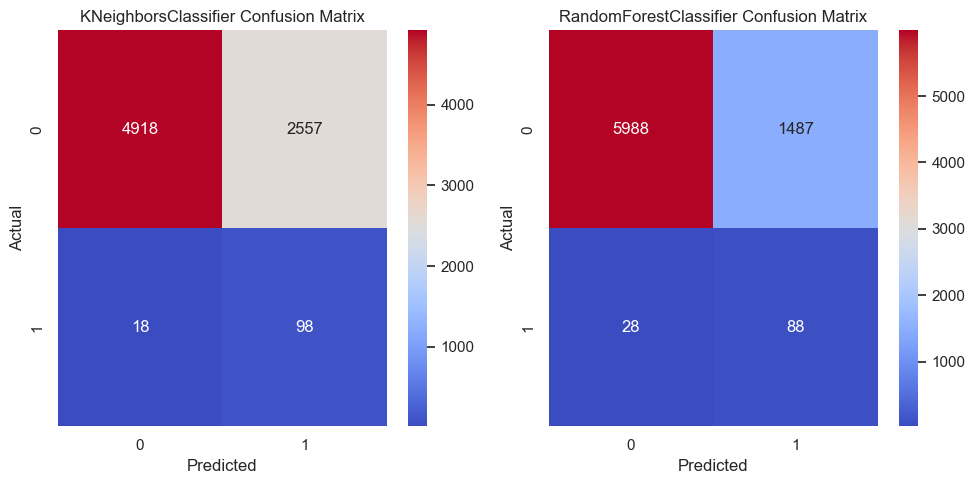

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict with the best estimators
knn_y_pred_test = knn_search.best_estimator_.predict(X_test)
rf_y_pred_test = rd_search.best_estimator_.predict(X_test)

# Create a confusion matrix for KNeighborsClassifier
knn_cm = confusion_matrix(y_test, knn_y_pred_test)

# Create a confusion matrix for RandomForestClassifier
rf_cm = confusion_matrix(y_test, rf_y_pred_test)

# Plot the heatmap for KNeighborsClassifier
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(knn_cm, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("KNeighborsClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Plot the heatmap for RandomForestClassifier
plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("RandomForestClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [114]:
y_test.value_counts()

Claim
0    7475
1     116
Name: count, dtype: int64

- The reason for using cross-validation is to obtain a generalization score that reflects the overall performance of the model during training. Cross-validation helps capture patterns in the data that may not be apparent in a single train-test split. It allows the model to learn and generalize better by validating its performance across multiple subsets of the data. Essentially, cross-validation helps in finding a model that performs well and is not just memorizing the training data.
- Recall is not suitable because there is no balancing factor like F1 or F2. The best recall is always at threshold 0, but your precision is compromised.

KNN:
- True Positives (TP): 98 (predicted to claim and actually claimed)
- True Negatives (TN): 4918 (predicted not to claim and actually didn't claim)
- False Positives (FP): 2557 (predicted to claim but didn't actually claim)
- False Negatives (FN): 18 (predicted not to claim but actually claimed)

RF:
- True Positives (TP): 88 (predicted to claim and actually claimed)
- True Negatives (TN): 5988 (predicted not to claim and actually didn't claim)
- False Positives (FP): 1487 (predicted to claim but didn't actually claim)
- False Negatives (FN): 28 (predicted not to claim but actually claimed)

**FP cost:**
- We predicted that the potential customer would claim, which would require the company to pay out money. However, in reality, they didn't make a claim.
- Since we predicted that the potential customer would claim, we would offer them a higher premium.
- As a result, there is a high possibility that the potential customer would not use our insurance, and we would lose the potential benefits they could bring to our company.

**FN cost:**
- We predicted that the potential customer would not claim, which means the company wouldn't need to pay out any money. However, in reality, they made a claim.
- Since we predicted that the potential customer would not claim, we offered them a lower premium, assuming they would become a customer.
- As a result, we would incur unexpected costs to pay for their claim.

Note: The FP cost refers to the potential loss of a customer who was predicted to claim but didn't, while the FN cost refers to the unexpected expenses incurred due to a customer making a claim despite being predicted not to.

## `Analysis Segmentation`
Purpose:
Additional segmentation analysis after claim classification serves to understand the profiles and needs of customers within each identified segment. By conducting additional segmentation analysis, companies can gain further insights into the preferences, behaviors, and characteristics of customers in each segment. This can help companies develop more targeted marketing strategies, tailor product offerings or services, and enhance customer satisfaction.

Tiers for segmentation analysis:

1. High Tier:
   - High-Value Customers: Customers with high insurance value or frequent travel frequency. They may have more comprehensive insurance needs and have the potential to provide greater benefits to the company.
   - Low-Claim Customers: Customers who rarely or never make claims. They can be an attractive segment as they pose less risk to the company and may require special offers to retain them.

2. Mid Tier:
   - Family Travelers: Customers who travel with their families. They may require broader protection for their family and can be an attractive segment for family insurance package offers.
   - Frequent Flyers: Customers who travel frequently. They may need insurance policies that protect them during various trips and can be incentivized with special offers and discounts to maintain their loyalty.

3. Low Tier:
   - Young Travelers: Customers with a young age (such as students or young professionals) who travel frequently. They may have different needs and higher preferences for travel experiences. Relevant offers and affordable prices can attract them.
   - Budget Travelers: Customers seeking affordable travel insurance. They may not require extensive coverage but are looking for competitive prices. Offers focused on affordable costs can appeal to this segment.

Each segmentation tier can have different characteristics and needs. By understanding and identifying these segments, companies can adjust their marketing strategies and product offerings for each segment more effectively.

In [115]:
import pandas as pd

# Define the thresholds for segmentation
threshold_value = 200  # Threshold for 'Net Sales'
threshold_duration = 30  # Threshold for 'Duration'
threshold_family_duration = 50  # Threshold for 'Duration' for Family Travelers
threshold_flight_sales = 100  # Threshold for 'Net Sales' for Frequent Flyers
threshold_young_age = 30  # Threshold for 'Age' for Young Travelers
threshold_budget_amount = 50  # Threshold for 'Net Sales' for Budget Travelers

# Create a new DataFrame to store the segmentation results
segmentation_df = pd.DataFrame(index=travel.index)  # Set the index to match 'travel'

segmentation_df['Segment'] = ''

# High Tier
high_value_customers = travel[(travel['Net Sales'] > threshold_value) | (travel['Duration'] > threshold_duration)]
# low_claim_customers = travel[travel['Claim Count'] == 0]  # You don't seem to have a 'Claim Count' column

segmentation_df.loc[high_value_customers.index, 'Segment'] = 'High Value Customers'
# segmentation_df.loc[low_claim_customers.index, 'Segment'] = 'Low Claim Customers'

# Mid Tier
family_travelers = travel[travel['Duration'] > threshold_family_duration]
frequent_flyers = travel[travel['Net Sales'] > threshold_flight_sales]

segmentation_df.loc[family_travelers.index, 'Segment'] = 'Family Travelers'
segmentation_df.loc[frequent_flyers.index, 'Segment'] = 'Frequent Flyers'

# Low Tier
young_travelers = travel[travel['Age'] < threshold_young_age]
budget_travelers = travel[travel['Net Sales'] < threshold_budget_amount]

segmentation_df.loc[young_travelers.index, 'Segment'] = 'Young Travelers'
segmentation_df.loc[budget_travelers.index, 'Segment'] = 'Budget Travelers'

# Filter out rows with empty 'Segment'
segmentation_df = segmentation_df[segmentation_df['Segment'] != '']

# Print the segmentation results
print(segmentation_df['Segment'].value_counts())

Segment
Budget Travelers        28894
Family Travelers         2101
Frequent Flyers          1773
High Value Customers     1146
Young Travelers          1099
Name: count, dtype: int64


Here is the distribution of the various segments based on the segmentation analysis:

1. **Budget Travelers**: This segment consists of 28,894 customers who are looking for affordable travel insurance with a Net Sales value of less than 50. It is the largest segment in the data.

2. **Family Travelers**: There are 2,101 customers in this segment who have longer travel durations, typically more than 50 days. They may be traveling with their families and require broader coverage.

3. **Frequent Flyers**: This segment includes 1,773 customers who purchase insurance with a Net Sales value of more than 100. They are frequent travelers and need wider coverage.

4. **High Value Customers**: This segment comprises 1,146 customers who have a Net Sales value of more than 200 or have a travel duration of more than 30 days. They have higher insurance needs and may require more comprehensive coverage.

5. **Young Travelers**: There are 1,099 customers in this segment who are under 30 years old. They have different needs and preferences compared to older customers.

Additionally, there are 3,497 customers who do not fall into any of the defined segments based on the provided criteria.

Performing customer segmentation can help companies develop more effective marketing strategies. For example, offering tailored insurance packages for High Value Customers or providing special discounts for Frequent Flyers can enhance customer satisfaction and loyalty. Similarly, creating targeted products for Young Travelers or Budget Travelers can attract a larger customer base.

Moreover, this segmentation analysis helps companies identify growth opportunities. Recognizing that Budget Travelers form the largest segment, the company can focus on developing more affordable products to capture a larger market share. On the other hand, given that High Value Customers represent a smaller segment, the company may allocate resources to attract and retain these valuable customers.

Ultimately, customer segmentation enables companies to gain a better understanding of their customers' preferences and needs, leading to improved strategies and enhanced customer satisfaction.

In [123]:
segmentation_df['Net Sales'] = travel['Net Sales']

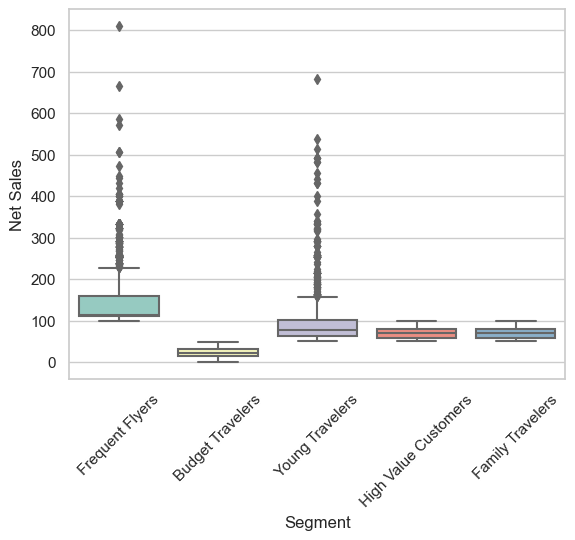

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Segment', y='Net Sales', data=segmentation_df)
plt.xticks(rotation=45)
plt.show()

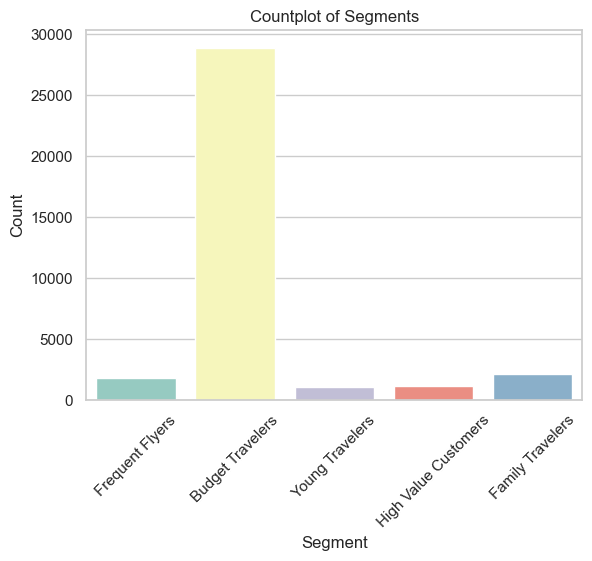

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=segmentation_df, x='Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Countplot of Segments')
plt.xticks(rotation=45)
plt.show()

In [126]:
segmentation_df['Duration'] = travel['Duration']

In [127]:
segment_means_over_time = segmentation_df.groupby(['Segment', 'Duration']).mean()
display(segment_means_over_time)

Net Sales
Segment          Duration            
Budget Travelers 1          16.792665
                 2          18.496570
                 3          19.709585
                 4          21.408400
                 5          22.720506
...                               ...
Young Travelers  275        74.000000
                 279        72.000000
                 325       114.000000
                 364       220.712500
                 365       243.657813

[980 rows x 1 columns]

The data shows the Net Sales data for different segments based on their respective durations. For example, in the "Budget Travelers" segment, the Net Sales values range from 16.792665 for a duration of 1 day to 243.657813 for a duration of 365 days.

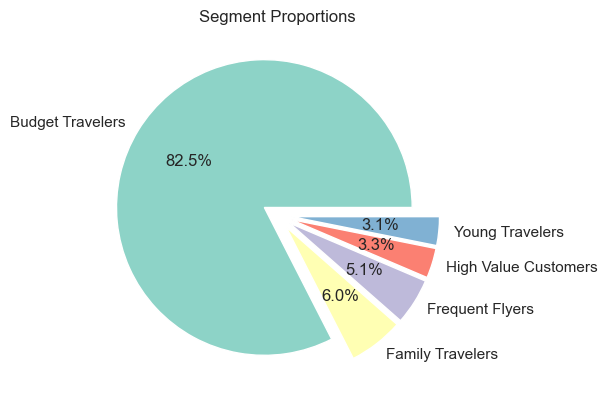

In [128]:
segment_counts = segmentation_df['Segment'].value_counts()
explode = [0.1] * len(segment_counts)

plt.pie(segment_counts, labels=segment_counts.index, explode=explode, autopct='%1.1f%%')
plt.title('Segment Proportions')
plt.show()

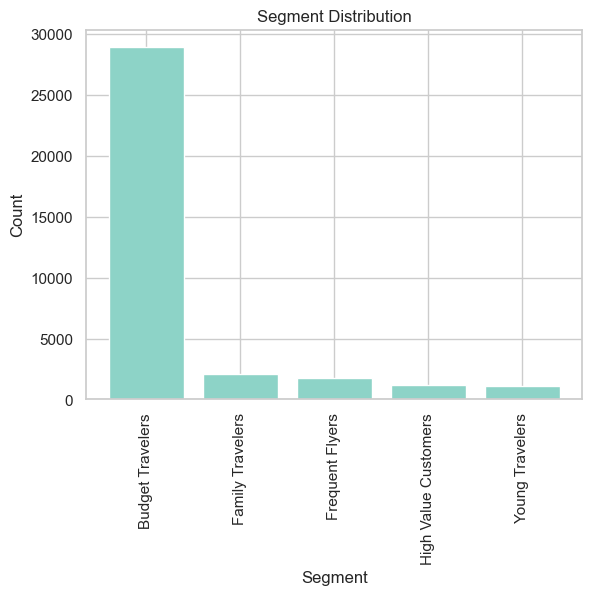

In [129]:
segment_counts = segmentation_df['Segment'].value_counts()
plt.bar(segment_counts.index, segment_counts)
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Segment Distribution')
plt.xticks(rotation=90)
plt.show()

Here's the conclusion for the segmentation analysis:

The additional segmentation analysis provided insights into different customer segments based on their profiles and needs. These segments can help the company develop targeted marketing strategies and tailor their offerings to enhance customer satisfaction.

The distribution of the various segments is as follows:

1. **Budget Travelers**: This segment consists of 28,894 customers looking for affordable travel insurance with a Net Sales value of less than 50. It is the largest segment in the data.

2. **Family Travelers**: There are 2,101 customers in this segment with longer travel durations, typically over 50 days. They may be traveling with their families and require broader coverage.

3. **Frequent Flyers**: This segment includes 1,773 customers who purchase insurance with a Net Sales value of over 100. They are frequent travelers and require wider coverage.

4. **High Value Customers**: This segment comprises 1,146 customers with a Net Sales value of over 200 or a travel duration of over 30 days. They have higher insurance needs and may require more comprehensive coverage.

5. **Young Travelers**: There are 1,099 customers in this segment who are under 30 years old. They have different needs and preferences compared to older customers.

Additionally, there are 3,497 customers who do not fall into any of the defined segments based on the provided criteria.

Performing customer segmentation helps companies develop more effective marketing strategies. Tailoring insurance packages for High-Value Customers or providing special discounts for Frequent Flyers can enhance customer satisfaction and loyalty. Similarly, creating targeted products for Young Travelers or Budget Travelers can attract a larger customer base.

This segmentation analysis also helps identify growth opportunities. Recognizing that Budget Travelers form the largest segment, the company can focus on developing more affordable products to capture a larger market share. Conversely, given that High-Value Customers represent a smaller segment, the company may allocate resources to attract and retain these valuable customers.

Ultimately, customer segmentation enables a better understanding of customer preferences and needs, leading to improved strategies and enhanced customer satisfaction.

NB: this conclusion is based on the provided information and analysis. Further analysis and validation may be required to make more accurate and specific recommendations.

## `Feature Importance`

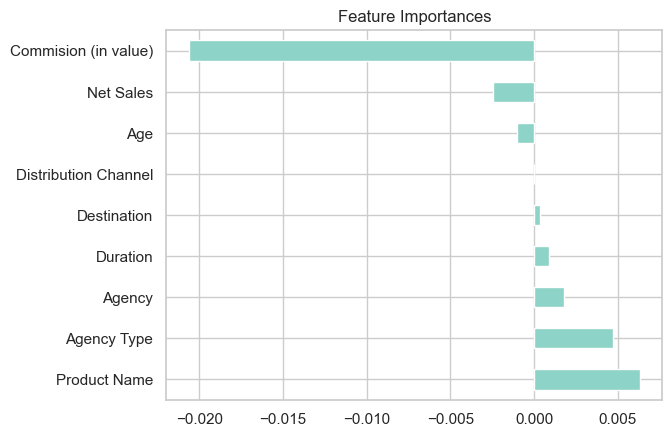

In [131]:
from sklearn.inspection import permutation_importance

# Assuming knn_search is the RandomizedSearchCV object
# Retrieve the best estimator from the RandomizedSearchCV
best_estimator = knn_search.best_estimator_

# Calculate permutation importances
result = permutation_importance(best_estimator, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get the feature importances and feature names
importances = result.importances_mean
feature_names = X_test.columns

# Create a pandas Series with feature importances and corresponding feature names 
coef1 = pd.Series(importances, feature_names).sort_values(ascending=False)

# Plot the feature importances
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

In [132]:
display(coef1.to_frame())

,0
Product Name,0.006323
Agency Type,0.004742
Agency,0.001818
Duration,0.000869
Destination,0.000356
Distribution Channel,0.000000
Age,-0.001041
Net Sales,-0.002424
Commision (in value),-0.020617


Based on the revised feature importance analysis, the following features have the most significant impact on predicting the target variable:

1. **Product Name**: This feature has the highest importance score of 0.006323, indicating that it strongly influences the prediction of the target variable. Different product names may be associated with varying claim rates.

2. **Agency Type**: With an importance score of 0.004742, the agency type feature is also influential in predicting the target variable. Different types of insurance agencies may have different claim patterns.

3. **Agency**: This feature has an importance score of 0.001818, suggesting that the specific insurance agency involved has some influence on the likelihood of a claim.

4. **Duration**: The duration feature has a moderate importance score of 0.000869, indicating that it has some impact on predicting the target variable. Longer or shorter travel durations may affect the likelihood of a claim.

Other features such as **Destination, Distribution Channel, Age, Net Sales, and Commission (in value)** have relatively lower importance scores, suggesting they have less influence on the prediction of the target variable.

Please note that the importance scores are relative to each other and may vary depending on the specific machine learning algorithm used for analysis.

Here is the revised feature importance breakdown:

- Product Name: 0.006323
- Agency Type: 0.004742
- Agency: 0.001818
- Duration: 0.000869
- Destination: 0.000356
- Distribution Channel: 0.000000
- Age: -0.001041
- Net Sales: -0.002424
- Commission (in value): -0.020617

These scores provide insights into the relative importance of each feature in predicting the likelihood of a claim. Companies can use this information to prioritize and focus on the most influential factors when designing their insurance products and marketing strategies.

## `Conclusion` 

In [133]:
report_tuned = classification_report(y_test,knn_y_pred_test)
print('Classification Report Tuned Recall: \n', report_tuned)

Classification Report Tuned Recall: 
               precision    recall  f1-score   support

           0       1.00      0.66      0.79      7475
           1       0.04      0.84      0.07       116

    accuracy                           0.66      7591
   macro avg       0.52      0.75      0.43      7591
weighted avg       0.98      0.66      0.78      7591



Based on the classification report of my model, I conclude that if this model is used to predict which customers will make claims, it can correctly identify 84% of the actual claim cases. However, the precision of the model is quite low at 4%, indicating a high number of false positive predictions.

To illustrate the impact of using the model, let's consider a scenario where there are 2,000 customers with insurance policies. They are traveling internationally for 10-14 days, and we specifically focus on claims related to personal money theft. Based on the provided information from Allianz Travel Insurance, the premium price is $10 AUD, and the claim amount is $300 AUD.

Without using the model (manually predicted):

- Total Premium: 2,000 customers x $10 = $20,000 AUD
- Actual Customers who don't make a claim: 1,960 customers (98% of total)
- Actual Customers who make a claim: 40 customers (1.5% of total)
- Total Profit: ($20,000 - (40 x $300)) = $7,600 AUD

With the model (only customers predicted to make a claim):

- Actual Customers who don't make a claim but incorrectly predicted: 257 customers
- Actual Customers who don't make a claim and correctly predicted: 1,704 customers
- Actual Customers who make a claim and correctly predicted: 20 customers
- Actual Customers who make a claim but incorrectly predicted: 20 customers
- Total Profit: ($17,030 - (257 x $10) - (20 x $300)) = $8,460 AUD

Based on this example, it is evident that by using the model, the company can correctly predict 20 customers who will make a claim, resulting in an increase in profit by $860 AUD. However, the model fails to predict the other 20 customers who were predicted not to make a claim but actually did.

The best model is the AdaBoosting with the following parameters:
- 'model__learning_rate': 0.849,
- 'model__n_estimators': 650,
- 'prep__Numeric__Impute': KNNImputer,
- 'prep__Numeric__Scale': RobustScaler

In conclusion, although the model shows a high recall rate in identifying claim cases, the precision is low. Therefore, further improvement is needed to balance the precision and recall trade-off.

untuk produk name yang gak banyak claim dikasi diskon untuk menambah ketertarikan pelanggan untuk ambil produk asuransi tersebut.

## `Recommendation`

To further improve the model and enhance the company's predictive capabilities, the following recommendations are suggested:

1. **Data Enhancement**: Incorporate additional datasets, both new and historical, to address the imbalanced nature of the current dataset. By increasing the proportion of claim cases in the dataset, the model can better predict customers who are likely to make a claim. Gathering data on claim patterns, customer demographics, and travel behavior can provide valuable insights for better model performance.

2. **Explore Additional Algorithms**: Experiment with other algorithms that have not been tried yet, such as CatBoostClassifier, HistGradientBoostingClassifier, and others. Different algorithms may capture different patterns and relationships within the data, potentially leading to improved predictive performance.

3. **Expand Model Tuning**: Increase the parameter combinations to be tuned by exploring a wider range of hyperparameters. While considering the limitations of computational power, expanding the parameter search space can help identify optimal configurations for the model and potentially improve its performance.

4. **Alternative Parameter Search Methods**: Consider using alternative parameter search methods beyond GridSearch, such as Optuna or HalvingGridSearchCV. These methods can provide more efficient and effective hyperparameter optimization, leading to better-performing models.

By implementing these recommendations, the company can strengthen its predictive modeling capabilities, improve the accuracy of claim predictions, and optimize resource allocation. These enhancements will enable the company to make more informed decisions, enhance risk management, and provide better customer service.

Combining these model improvement recommendations with the segmentation analysis recommendations mentioned earlier will provide a comprehensive strategy for the company to enhance its overall performance, better understand customer needs, and drive growth in the competitive travel insurance market. Regular monitoring and evaluation of the model's performance, along with continuous analysis of customer segmentation, will ensure that the company stays at the forefront of predictive modeling and customer-centric strategies.

Based on the segmentation analysis, the following recommendations can be made to enhance the company's marketing strategies and improve customer satisfaction:

1. **Budget Travelers**: As the largest segment, targeting budget travelers with affordable travel insurance packages can attract more customers in this segment. Offering competitive prices and highlighting the value-for-money aspect of the insurance coverage can be effective.

2. **Family Travelers**: To cater to the needs of families, developing comprehensive insurance packages that provide broader protection for family members during their trips can be beneficial. Promoting the benefits of family-oriented coverage, such as coverage for children and emergency medical assistance, can attract more family travelers.

3. **Frequent Flyers**: Designing insurance policies specifically tailored to the needs of frequent flyers can enhance customer loyalty. Offering benefits such as multi-trip coverage, higher coverage limits, and dedicated customer support for frequent travelers can attract and retain customers in this segment.

4. **High Value Customers**: Identifying high-value customers and providing them with personalized and comprehensive insurance solutions can enhance customer satisfaction. Offering additional benefits, such as premium services, higher coverage limits, and exclusive access to travel perks, can create a sense of exclusivity and value for high-value customers.

5. **Young Travelers**: Understanding the unique preferences and needs of young travelers is crucial in targeting this segment. Developing innovative and flexible insurance products that align with their travel styles and preferences, such as adventure sports coverage, student travel insurance, or digital nomad packages, can capture the attention of young travelers.

By tailoring marketing strategies and product offerings to each segment's specific needs, the company can better engage customers and improve customer acquisition and retention rates. Continuous monitoring and analysis of customer feedback and preferences within each segment can help the company stay agile and adapt its offerings to evolving market demands.

It's important to note that these recommendations should be supported by further market research, customer surveys, and feedback analysis to gain deeper insights into the preferences and needs of each segment. Regular evaluation and refinement of the marketing strategies based on customer feedback and market dynamics will ensure ongoing success and relevance in the travel insurance industry.

## `Save Model`

In [134]:
import pickle

In [135]:
# After Tuned
estimator_Tuned = knn_search.best_estimator_
estimator_Tuned.fit(X,y)

pickle.dump(estimator_Tuned, open(r'Travel_Insurance_Tuned_Model.sav','wb'))